#**Avance 1. Análisis Exploratorio de Datos**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Proyecto Integrador**
###**Tecnológico de Monterrey**
###**Prof. Dra. Grettel Barceló Alonso**

###**Equipo 4**

####**A01166618 Rogelio Rivera Meléndez**
####**A01794708 Juan José Hurtado Ordoñez**
####**A00439670 Ignacio Sáyago Vela**

**INTRODUCCIÓN**


En este documento se lleva a cabo el análisis exploratorio de datos para la funcionalidad del sistema por desarollar, que pretende determinar si un reclamo por siniestro de vehículo es fraudulento o legítimo mediante técnicas de machine learning.

Para ello se utilizará una base de datos generada por Oracle, que contiene 15420 registros con los datos de la póliza de seguro y el reporte de siniestro para reclamos presentados a seguradoras tanto legítimos como fraudulentos.

Esta base de datos es abierta y se puede obtener por medio de la siguiente liga en la página de Kaggle https://www.kaggle.com/datasets/shivamb/vehicle-claim-fraud-detection

Cabe mencionar que para las otras funcionalidades del sistema no se requiere llevar a cabo un análisis exploratorio de datos puesto que se emplearán técnicas de deep learning y visión computacional, utilizando conjuntos de datos que constan de imágenes que ya han sido preprocesadas.    


**IMPORTACIÓN DE LIBRERÍAS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score

from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

from tabulate import tabulate

from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.under_sampling import TomekLinks
from imblearn.combine import SMOTETomek

from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SelectFromModel

#**PARTE 1: Análisis descriptivo y preprocesamiento de los datos:**


##**1) El problema de reclamos fraudulentos en siniestros de vehículos**

De acuerdo con Khalil (2024), el problema de reclamos fraudulentos por siniestros de vehículos representa un costo significativo para las aseguradoras a nivel mundial e impacta directamente en los costos de las primas de seguros de automóviles. Por lo tanto, detectar estos fraudes se ha vuelto un reto significativo para las aseguradoras.

Sin embargo, según Khalil (2024), implemenatr modelos de machine learning para la detección de este tipo de fraudes no es trivial, puesto que los conjuntos de datos que tienen las aseguradoraspueden contener errores de captura, datos faltantes y presentan un alto grado de desbalanceo de clases, puesto que contienen muchos más registros de reclamos legítimos que de reclamos fraudulentos.

Por tal motivo, es indispensable realizar a conciencia el análisis exploratorio de datos en este tipo de conjuntos de datos, para obtener el mejor modelo de predicción posible.

El dataset que se empleará, contiene 33 atributos que se describen a continuación (Subudhi, 2018):
<br><br>

Sl. No.  |Attributes               |Description
---------|-------------------------|-----------------------------------------
1        |Month                    |Month of accident
2        |WeekofMonth              |Week of accident
3        |DayofWeek                |Day of accident
4 |Make |Manufacture company of car (19 companies)
5 |AccidentArea |Area where accident took place (Rural or Urban)
6 |DayofWeekClaimed |Day of filing Insurance claim
7 |MonthClaimed |Month of filing Insurance claim
8 |WeekofMonthClaimed |Week of filing Insurance claim
9 |Gender |Gender of Insurance claimant (Male or Female)
10 |MaritalStatus |Single, married, widow and divorced
11 |Age |Age of Insurance policy holder
12 |Fault |Policy holder or third party
13 |PolicyType |Type of policies issued (1-9)
14 |VehicleCategory |Sedan, sport or utility
15 |VehiclePrice |Price of vehicle (6 categories)
16 |PolicyNumber |Policy number issued to customer
17 |RepNumber |ID of the person who handle the claim (16 categories)
18 |Deductible |Amount to be deducted before claim disbursement
19 |DriverRating |Experience of the driver (4 categories)
20 |DaysPolicyAccident |Days from policy issuance to accident
21 |DaysPolicyClaim |Days from policy issuance to claim filing
22 |PastNumberofClaims |Past number of claims filed by customer
23 |AgeofVehicle |Age of the vehicle (8 categories)
24 |AgeofPolicyHolder |Policy holder’s age (9 categories)
25 |PoliceReportFiled |Police report filed after accident (Yes or No)
26 |WitnessPresented |Witness present during accident (Yes or No)
27 |AgentType |Type of insurance agent (Internal or External)
28 |NumberofSupplements |Number of supplements
29 |AddressChangeClaim |Time from claim filing to address change
30 |NumberofCars |Number of cars owned by the claimant
31 |Year |Year – 1994, 1995 and 1996
32 |BasePolicy |Base policy of the insurance (3 categories)
33 |FraudFound |Binary Class (Yes or No)
<br><br>

Estos atributos podrían agruparse de la siguiente manera (Benedek, 2019):

* car characteristics: Make, VehicleCategory, VehiclePrice, AgeOfVehicle
* accident characteristics: Month, WeekOfMonth, DayOfWeek,
AccidentArea, Fault, PoliceReportFiled, WitnessPresent
* driver characteristics: Sex, MaritalStatus, Age, DriverRating,
PastNumberOfClaims
*  claimant characteristics: DayOfWeekClaimed, MonthClaimed,
WeekOfMonthClaimed, PolicyType, RepNumber, AgeOfPolicyHolder,
NumberOfCars
<br><br>
Bibliografía:
<br><br>
Khalil A. A., Liu Z., Fathalla A., Ali A. & Salah A. (2024). Machine learning based method for insurance fraud detection on class imbalance datasets with missing values. IEEE Journals & Magazine | IEEE Xplore. https://ieeexplore.ieee.org/document/10695046
<br><br>
Subudhi, Sharmila & Panigrahi, Suvasini. (2018). Detection of Automobile Insurance Fraud Using Feature Selection and Data Mining Techniques. International Journal of Rough Sets and Data Analysis. 5. 1-20. 10.4018/IJRSDA.2018070101. https://www.researchgate.net/publication/326102521_Detection_of_Automobile_Insurance_Fraud_Using_Feature_Selection_and_Data_Mining_Techniques
<br><br>
Benedek, B., & László, E. (2019). Identifying key fraud indicators in the automobile insurance industry using SQL server analysis services. Studia Universitatis Babeş-Bolyai. Oeconomica, 64(2), 53–71. https://doi.org/10.2478/subboec-2019-0009

##**2) Carga de la base de datos**

In [ ]:
# Se importa el dataset de Kaggle cargado en nuestro repositorio de Github

!wget https://github.com/IgnacioSay/Dataset_Deteccion_Fraude/archive/refs/heads/main.zip

!unzip /content/main.zip

df = pd.read_csv('/content/Dataset_Deteccion_Fraude-main/data/fraud_oracle.csv', skiprows=0, na_values=[' ', '', '  ', '   '])

--2025-05-18 03:44:50--  https://github.com/IgnacioSay/Dataset_Deteccion_Fraude/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/IgnacioSay/Dataset_Deteccion_Fraude/zip/refs/heads/main [following]
--2025-05-18 03:44:50--  https://codeload.github.com/IgnacioSay/Dataset_Deteccion_Fraude/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘main.zip’

main.zip                [       <=>          ]  21.46M  12.6MB/s    in 1.7s    

2025-05-18 03:44:53 (12.6 MB/s) - ‘main.zip’ saved [22503175]

Archive:  /content/main.zip
5008f52af830ed8444648febe5faa4049bf2b519
   creating: Dataset_Deteccion

In [ ]:
# Se visualiza el dataset

pd.set_option('display.max_columns', None)
df

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Age,Fault,PolicyType,VehicleCategory,VehiclePrice,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,21,Policy Holder,Sport - Liability,Sport,more than 69000,0,1,12,300,1,more than 30,more than 30,none,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,34,Policy Holder,Sport - Collision,Sport,more than 69000,0,2,15,400,4,more than 30,more than 30,none,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,47,Policy Holder,Sport - Collision,Sport,more than 69000,0,3,7,400,3,more than 30,more than 30,1,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,65,Third Party,Sedan - Liability,Sport,20000 to 29000,0,4,4,400,2,more than 30,more than 30,1,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,27,Third Party,Sport - Collision,Sport,more than 69000,0,5,3,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,35,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15416,5,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,30,Policy Holder,Sedan - Liability,Sport,30000 to 39000,0,15417,11,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,24,Policy Holder,Sedan - Collision,Sedan,20000 to 29000,1,15418,4,400,4,more than 30,more than 30,more than 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,34,Third Party,Sedan - All Perils,Sedan,20000 to 29000,0,15419,6,400,4,more than 30,more than 30,none,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [ ]:
# Se visualiza cuántos valores no nulos contiene cada columna

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

Aunque no existen valores nulos en el conjunto de datos, al analizar con más detalle los datos, se puede ver que existen variables como **'DayOfWeekClaimed'** y **'MonthClaimed'** con registros cuyo valor es '0' cuando el valor debería ser algún día de la semana. También la variable **'Age'** tiene registros cuyo valor es '0' pero esta variable se eliminará más adelante del dataset, por lo que solamente se imputarán valores para las variables **'DayOfWeekClaimed'** y **'MonthClaimed'**

In [ ]:
# Se valida el número de registros con valor "0" en las variables 'DayOfWeekClaimed' y 'MonthClaimed'

# Número de registros en los que DayOfWeekClaimed es "0"
DayOfWeekClaimed_zero_count = len(df[(df['DayOfWeekClaimed'] == '0')])

print(f"El número de registros en los que DayOfWeekClaimed es '0': {DayOfWeekClaimed_zero_count}")

# Número de registros en los que MonthClaimed es "0"
MonthClaimed_zero_count = len(df[(df['MonthClaimed'] == '0')])

print(f"El número de registros en los que MonthClaimed es '0': {MonthClaimed_zero_count}")

El número de registros en los que DayOfWeekClaimed es '0': 1
El número de registros en los que MonthClaimed es '0': 1


In [ ]:
# Se imputan los valores '0' en 'DayOfWeekClaimed' and 'MonthClaimed' con la moda

# Moda para 'DayOfWeekClaimed'
mode_day_of_week = df['DayOfWeekClaimed'].mode()[0]

# Se reemplaza '0' on la moda
df['DayOfWeekClaimed'] = df['DayOfWeekClaimed'].replace('0', mode_day_of_week)

# Moda para 'MonthClaimed'
mode_month_claimed = df['MonthClaimed'].mode()[0]

# Se reemplaza '0' on la moda
df['MonthClaimed'] = df['MonthClaimed'].replace('0', mode_month_claimed)

# Se valida el número de registros con valor "0" en las variables 'DayOfWeekClaimed' y 'MonthClaimed'

# Número de registros en los que DayOfWeekClaimed es "0"
DayOfWeekClaimed_zero_count = len(df[(df['DayOfWeekClaimed'] == '0')])

print(f"El número de registros en los que DayOfWeekClaimed es '0': {DayOfWeekClaimed_zero_count}")

# Número de registros en los que MonthClaimed es "0"
MonthClaimed_zero_count = len(df[(df['MonthClaimed'] == '0')])

print(f"El número de registros en los que MonthClaimed es '0': {MonthClaimed_zero_count}")

El número de registros en los que DayOfWeekClaimed es '0': 0
El número de registros en los que MonthClaimed es '0': 0


In [ ]:
# Se obtiene el tipo de dato de cada columna

df.dtypes

,0
Month,object
WeekOfMonth,int64
DayOfWeek,object
Make,object
AccidentArea,object
DayOfWeekClaimed,object
MonthClaimed,object
WeekOfMonthClaimed,int64
Sex,object
MaritalStatus,object


Al revisar el contenido de las variables numéricas de tipo entreo (int64), se observa todas excepto **'Age'** (que se eliminará más adelante) funcionan como variables categóricas. Particularmente, las variables '**PolicyNumber**' y **'RepNumber'** funcionan como nominales. Esta última se convertirá al tipo 'object' con el fin de no considerarla como numérica sino como nominal. La variable '**PolicyNumber**' se eliminará posteriormente ya que solamente representa un ID para cada registro, por loque es irrelevante.

In [ ]:
# Se convierte la variable 'RepNumber' a tipo 'object'

df['RepNumber'] = df['RepNumber'].astype('object')

##**Variables Numéricas**##

In [ ]:
# Se obtiene el resumen estadístico de los datos numéricos

df.describe().T

,count,mean,std,min,25%,50%,75%,max
WeekOfMonth,15420.0,2.788586,1.287585,1.0,2.00,3.0,4.00,5.0
WeekOfMonthClaimed,15420.0,2.693969,1.259115,1.0,2.00,3.0,4.00,5.0
Age,15420.0,39.855707,13.492377,0.0,31.00,38.0,48.00,80.0
FraudFound_P,15420.0,0.059857,0.237230,0.0,0.00,0.0,0.00,1.0
PolicyNumber,15420.0,7710.500000,4451.514911,1.0,3855.75,7710.5,11565.25,15420.0
Deductible,15420.0,407.704280,43.950998,300.0,400.00,400.0,400.00,700.0
DriverRating,15420.0,2.487808,1.119453,1.0,1.00,2.0,3.00,4.0
Year,15420.0,1994.866472,0.803313,1994.0,1994.00,1995.0,1996.00,1996.0


In [ ]:
# Se hace una lista de variables numéricas
num_cols = df.select_dtypes(include='integer').columns.tolist()
num_cols

['WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'FraudFound_P',
 'PolicyNumber',
 'Deductible',
 'DriverRating',
 'Year']

In [ ]:
# Se verifica que la variable dependiente sea binaria en todo el conjunto de datos

df['FraudFound_P'].nunique()

2

**a) ¿Cuántas y cuáles de las variables son numéricas?**

Con el método .info() podemos ver que el dataframe tiene 8 variables numéricas de tipo entero.
<br><br>
**i. ¿Cuántas y cuáles de estas variables numéricas son de valor entero?**

En este dataframe, las 8 variables numéricas que existen son de valor entero. El listado de estas variables obtenido con la instrucción: `df.select_dtypes(include='integer').columns.tolist()`, es el siguiente:

'WeekOfMonth',
 'WeekOfMonthClaimed',
 'Age',
 'FraudFound_P',
 'PolicyNumber',
 'Deductible',
 'DriverRating',
 'Year'

Cabe destacar que la mayoría de estas variables aunque están representadas por un número entero, en realidad su función es categórica, ya sea nominal, ordinal o binaria, conforme se inidca en la siguiente tabla:

Variable|Tipo|Niveles
--------|----|-------
WeekOfMonth|Categórica ordinal|5
WeekOfMonthClaimed|Categórica ordinal|5
Age|Numérica|No aplica
FraudFound_P|Binaria|2
PolicyNumber|Categórica nominal|15420
Deductible|Categórica ordinal|4
DriverRating|Categórica ordinal|4
Year|Categórica ordinal|3
<br><br>

**ii. ¿Cuántas y cuáles de estas variables numéricas son de valor real (flotante)?**

Con el método info() podemos ver que este dataframe no contiene variables numéricas de valor real, sólo enteros y objetos (texto).
<br><br>

**iii. De existir el caso, ¿cuántas y cuáles de estas variables numéricas se pueden anular del problema?**

La variable que indudablemente se puede <mark>anular es **'PolicyNumber'**</mark> (porque el número de póliza representa un valor distinto para cada observación, pero para ello ya contamos con el índice y por lo tanto no es un dato relevante). Cabe mencionar que si el dataframe no tuviera un índice, esta variable podría emplearse como índice o identificador único, puesto que con el método nunique se ha confirmado que todos sus valores son diferentes.
<br><br>
**iv. Casos especiales**

La variable **'Year'** indica el año en el que se registró el reclamo y se espera que sea irrelevante pero si un año en particular registra sustancialmente más reclamos o fraudes habría que analizar el motivo.

Cabe mencionar que la variable **'Deductible'** aunque se esperaría que representara el importe a pagar de "deducible", en este conjunto de datos solamente tienen 4 valores diferentes. Por ello se considera que tiene la función de categórica ordinal.

##**Variables Categóricas**##

In [ ]:
# Se hace una lista de variables categóricas
txt_cols = df.select_dtypes(include='object').columns.tolist()
txt_cols

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'RepNumber',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [ ]:
df.describe(include = 'object').T.rename(columns = {'count':'Recuento', 'unique':'Cardinalidad', 'top':'Moda', 'freq':'Frecuencia'})

,Recuento,Cardinalidad,Moda,Frecuencia
Month,15420,12,Jan,1411
DayOfWeek,15420,7,Monday,2616
Make,15420,19,Pontiac,3837
AccidentArea,15420,2,Urban,13822
DayOfWeekClaimed,15420,7,Monday,3758
MonthClaimed,15420,12,Jan,1447
Sex,15420,2,Male,13000
MaritalStatus,15420,4,Married,10625
Fault,15420,2,Policy Holder,11230
PolicyType,15420,9,Sedan - Collision,5584


**b) ¿Cuántas y cuáles de las variables son categóricas?**

Con la instrucción: `df.select_dtypes(include='object').columns.tolist()`, obtenemos el siguiente listado de las 25 variables categóricas que contiene el dataframe:

'Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'RepNumber',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy'

Por otra parte, con la instrucción: `df.describe(include = 'object').T.rename(columns = {'count':'Recuento', 'unique':'Cardinalidad', 'top':'Moda', 'freq':'Frecuencia'})`, obtenemos la información requerida para responder las siguientes preguntas:
<br><br>

**i. ¿Cuántas y cuáles de estas variables son binarias?**

Las 6 variables binarias que existen en el dataframe son:

Variable|Tipo
--------|-------
AccidentArea|Binaria
Sex|Binaria
Fault|Binaria
PoliceReportFiled|Binaria
WitnessPresent|Binaria
AgentType|Binaria

<br>


**ii. ¿Cuántas y cuáles de estas variables son nominales? Indica el total de niveles que tiene cada una de estas variables.**

Las 5 variables nominales son:

Variable|Tipo|Número de niveles
--------|----|------------------
Make|Nominal|19
MaritalStatus|Nominal|4
PolicyType|Nominal|9
RepNumber|Nominal|16
VehicleCategory|Nominal|3
BasePolicy|Nominal|3
<br><br>

**iii. ¿Cuántas y cuáles de estas variables son ordinales? Indica el total de niveles que tiene cada una de estas variables.**

Las 13 variables ordinales son:

Variable|Tipo|Número de niveles
--------|----|------------------
Month|Ordinal|12
DayOfWeek|Ordinal|7
DayOfWeekClaimed|Ordinal|7
MonthClaimed|Ordinal|12
VehiclePrice|Ordinal|6
Days_Policy_Accident|Ordinal|4
Days_Policy_Claim|Ordinal|4 (aunque solo existen 3 en el dataset)
PastNumberOfClaims|Ordinal|3
AgeOfVehicle|Ordinal|8
AgeOfPolicyHolder|Ordinal|9
NumberOfSuppliments|Ordinal|3
AddressChange_Claim|Ordinal|5
NumberOfCars|Ordinal|5
<br><br>

**iv. De existir el caso, ¿cuántas y cuáles de estas variables categóricas se pueden anular del problema?**

<Mark>La variable **'Age'** se puede anular</Mark> puesto que ya se cuenta con la variable 'AgeOfPolicyHolder' que está categorizada por rangos de edad. Asimismo, <Mark>la variable **'PolicyType'** puede anularse</Mark> puesto que las variables **'VehicleCategory'** y '**BasePolicy**' ya cuentan con la información que contiene la variable **'PolicyType'**. Por otra parte la variable **'AgentType'** (tipo de agente que tramitó la póliza, Interno ó Externo) se podría anular puesto que en la mayoría de los registros el agente es "Externo". Sin embargo, cuando el agente es externo, en el 6.1 % de los casos se cometió fraude mientras que cuando el agente es interno solamente en el 1.7% de los casos se cometió fraude. Por tal motivo, <mark>por el momento no se eliminarán esta variable hasta contar con mas información sobre su relevancia o irrelevancia</mark>.



In [ ]:
# Número de registros en los que AgentType es "Internal"
at_internal_count = len(df[(df['AgentType'] == 'Internal')])


# Número de registros en los que AgentType es "Internal" y FraudFound_P es "1"
at_internal_fraud_count = len(df[(df['AgentType'] == 'Internal') & (df['FraudFound_P'] == 1)])

at_internal_fraud_percentage = (at_internal_fraud_count / at_internal_count) * 100

print(f"El porcentaje de registros en los que AgentType es 'Internal' y  FraudFound_P es '1': {at_internal_fraud_percentage}")


# Número de registros en los que AgentType es "External"
at_external_count = len(df[(df['AgentType'] == 'External')])


# Número de registros en los que AgentType es "External" y FraudFound_P es "1"
at_external_fraud_count = len(df[(df['AgentType'] == 'External') & (df['FraudFound_P'] == 1)])

at_external_fraud_percentage = (at_external_fraud_count / at_external_count) * 100

print(f"El porcentaje de registros en los que AgentType es 'External' y  FraudFound_P es '1': {at_external_fraud_percentage}")


El porcentaje de registros en los que AgentType es 'Internal' y  FraudFound_P es '1': 1.6597510373443984
El porcentaje de registros en los que AgentType es 'External' y  FraudFound_P es '1': 6.054417287041307


**c) En esta base de datos y con base a la información dada, ¿existe alguna o algunas variables cuya clasificación en algún tipo de dato dependa del analista? ¿Cuáles y por qué?**

La variable 'MaritalStatus' podría considerarse como ordinal, asumiendo que entre más compromisos de pareja tenga una persona es más probable que tenga tendencias a cometer un fraude, o que primero alguien debe ser "soltero" para después ser "casado" y después "divorciado". Sin embargo, por el momento esta variable se considera como nominal y conforme avance en el análisis se evaluará si hay indicios para considerarla como ordinal.

Cabe mencionar que a las variables **'PolicyNumber'** y '**RepNumber**' se les asignó un ID secuencial, por lo que están conformadas por números enteros secuenciales 1,2,3,4..etc. Sin embargo, estos números representan un identificador, por lo que se consideran Categóricas Nominales

**d) Se eliminan del problema todas las variables que no están aportando información alguna.**

Las varibles: 'PolicyNumber', 'Age', 'PolicyType', 'Make' (Puesto que para el objetivo del modelo no es práctico tener información de las marcas de los autos ya que cambian constantemente y el precio del auto puede ser mejor indicador), RepNumber y Year (puesto que para los objetivos del modelo, la predicción no se debe basar en el número de representante o el año en que ocurrió el accidente) se eliminarán permanentemente del dataframe con la instrucción:
<br><br>
df.drop(columns=['PolicyNumber', 'Age', 'PolicyType', 'Make', 'RepNumber', 'Year' ], inplace=True)

In [ ]:
df.drop(columns=['PolicyNumber', 'Age', 'PolicyType', 'Make', 'RepNumber', 'Year'], inplace=True)
df.T

Output hidden; open in https://colab.research.google.com to view.

**3) Se realiza una partición de los datos en Entrenamiento, Validación y Prueba, del 70%, 15% y 15%, respectivamente. Llamando a dichos conjuntos Xtrain, Xval, Xtest, ytrain, yval, ytest, para los datos de entrada y de salida, respectivamente. Dicha partición debe conservar la estratificación de las clases de la variable “FraudFound_P”.**

In [ ]:
## En la siguiente liga se indica como partir en train, val y test utilizando la función train_test_split (con la cual se puede conservar la estratificación)
## https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn

## Tambien explica como definir el tamaño del conjunto de validación utilizando una segunda vez la función train_test_split
## (1.0/(1.0-test_size))*validation_size = second_test_size
## En este caso: (1.0/(1.0-0.15))*0.15 = 0.17647

# Se divide el dataframe en los conjuntos Auxiliar y Prueba
strat_aux_set, strat_test_set = train_test_split(
df, test_size=0.15, stratify=df["FraudFound_P"], random_state=1)

# Se divide el conjunto Auxiliar en los conjuntos Entrenamiento y Validación
strat_train_set, strat_val_set = train_test_split(
strat_aux_set, test_size=0.17647, stratify=strat_aux_set["FraudFound_P"], random_state=1)

# Se subdividen los conjuntos de Entrenamiento, Validación y Prueba en datos de Entrada y de Salida
Xtrain = strat_train_set.drop('FraudFound_P', axis='columns')
Xval = strat_val_set.drop('FraudFound_P', axis='columns')
Xtest = strat_test_set.drop('FraudFound_P', axis='columns')
ytrain = strat_train_set['FraudFound_P']
yval = strat_val_set['FraudFound_P']
ytest = strat_test_set['FraudFound_P']

# Se covierten los datos de salida en dataframes
ytrain = ytrain.to_frame()
yval = yval.to_frame()
ytest = ytest.to_frame()

#se eliminan las variables auxiliares
del strat_train_set
del strat_val_set
del strat_test_set
del strat_aux_set

In [ ]:
display(Xtrain,Xval,Xtest,ytrain,yval,ytest)

,Month,WeekOfMonth,DayOfWeek,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Fault,VehicleCategory,VehiclePrice,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
12012,Jan,2,Sunday,Urban,Monday,Jan,2,Male,Single,Policy Holder,Sport,40000 to 59000,400,3,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,more than 5,1 year,2 vehicles,Liability
1149,Jul,3,Tuesday,Urban,Wednesday,Aug,3,Male,Single,Policy Holder,Sedan,20000 to 29000,400,3,more than 30,more than 30,none,2 years,21 to 25,No,No,External,1 to 2,no change,1 vehicle,All Perils
11427,Aug,3,Wednesday,Urban,Monday,Aug,4,Male,Married,Policy Holder,Sedan,20000 to 29000,400,2,more than 30,more than 30,1,more than 7,51 to 65,No,No,External,3 to 5,no change,1 vehicle,All Perils
3476,May,2,Sunday,Urban,Tuesday,May,3,Male,Married,Third Party,Sedan,30000 to 39000,400,2,more than 30,more than 30,none,more than 7,41 to 50,No,No,External,none,no change,1 vehicle,Collision
6678,Aug,3,Wednesday,Urban,Wednesday,Aug,3,Male,Married,Policy Holder,Sedan,20000 to 29000,400,3,more than 30,more than 30,2 to 4,6 years,41 to 50,No,No,External,1 to 2,4 to 8 years,2 vehicles,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8581,Jul,1,Friday,Urban,Friday,Jul,2,Male,Married,Third Party,Sport,30000 to 39000,400,3,more than 30,more than 30,2 to 4,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Liability
2782,Nov,4,Friday,Urban,Tuesday,Nov,5,Male,Married,Third Party,Sport,20000 to 29000,400,3,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Liability
14774,Sep,3,Monday,Urban,Tuesday,Sep,3,Male,Married,Policy Holder,Sport,20000 to 29000,400,1,more than 30,more than 30,more than 4,7 years,36 to 40,No,No,External,more than 5,no change,1 vehicle,Liability
9828,Nov,2,Wednesday,Urban,Tuesday,Nov,4,Male,Married,Policy Holder,Sport,20000 to 29000,400,2,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,3 to 5,1 year,2 vehicles,Liability


,Month,WeekOfMonth,DayOfWeek,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Fault,VehicleCategory,VehiclePrice,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
9475,May,3,Sunday,Urban,Wednesday,May,3,Male,Married,Policy Holder,Sedan,20000 to 29000,400,3,more than 30,more than 30,none,5 years,41 to 50,No,No,External,1 to 2,no change,1 vehicle,Collision
3691,Feb,1,Monday,Urban,Wednesday,Feb,2,Male,Single,Policy Holder,Sedan,30000 to 39000,400,4,more than 30,more than 30,1,7 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision
4061,Jun,4,Wednesday,Urban,Monday,Jun,4,Male,Married,Third Party,Sedan,20000 to 29000,700,4,more than 30,more than 30,none,more than 7,36 to 40,No,No,External,3 to 5,no change,1 vehicle,All Perils
3096,Feb,3,Friday,Urban,Thursday,Feb,4,Male,Single,Policy Holder,Sport,more than 69000,400,1,more than 30,more than 30,2 to 4,new,16 to 17,No,No,External,none,no change,1 vehicle,Liability
7021,Dec,4,Sunday,Urban,Wednesday,Feb,3,Male,Married,Policy Holder,Sport,20000 to 29000,400,4,more than 30,more than 30,2 to 4,more than 7,51 to 65,No,No,External,none,no change,1 vehicle,Liability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9892,Oct,1,Wednesday,Urban,Friday,Oct,2,Male,Single,Policy Holder,Sport,20000 to 29000,400,2,more than 30,more than 30,more than 4,6 years,31 to 35,No,No,External,none,no change,1 vehicle,Liability
4072,Sep,1,Tuesday,Urban,Thursday,Sep,2,Male,Single,Third Party,Sedan,20000 to 29000,400,2,more than 30,more than 30,1,6 years,26 to 30,No,No,External,3 to 5,no change,1 vehicle,All Perils
4342,May,5,Sunday,Urban,Tuesday,Jun,1,Male,Single,Policy Holder,Sedan,20000 to 29000,400,3,more than 30,more than 30,2 to 4,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,Collision
4484,Nov,4,Sunday,Urban,Monday,Nov,4,Male,Single,Third Party,Sedan,20000 to 29000,400,1,more than 30,more than 30,none,5 years,31 to 35,No,No,External,none,no change,1 vehicle,Collision


,Month,WeekOfMonth,DayOfWeek,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,Fault,VehicleCategory,VehiclePrice,Deductible,DriverRating,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy
9698,Jul,2,Thursday,Urban,Monday,Jul,2,Male,Married,Policy Holder,Sedan,20000 to 29000,400,3,more than 30,more than 30,2 to 4,more than 7,41 to 50,No,No,External,more than 5,no change,1 vehicle,Collision
10643,Mar,4,Wednesday,Urban,Wednesday,Mar,4,Female,Married,Policy Holder,Sedan,20000 to 29000,400,1,more than 30,more than 30,2 to 4,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,Collision
13129,Jun,4,Friday,Rural,Tuesday,Jul,1,Male,Married,Policy Holder,Utility,more than 69000,400,3,more than 30,more than 30,1,more than 7,36 to 40,No,No,External,1 to 2,no change,1 vehicle,All Perils
3127,May,3,Friday,Rural,Monday,May,4,Male,Married,Third Party,Sedan,more than 69000,400,2,more than 30,more than 30,none,7 years,36 to 40,No,No,External,none,no change,1 vehicle,Collision
11710,Nov,1,Wednesday,Urban,Friday,Nov,3,Male,Married,Policy Holder,Sedan,20000 to 29000,400,3,more than 30,more than 30,none,more than 7,36 to 40,No,No,External,none,no change,1 vehicle,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4138,Nov,2,Friday,Urban,Monday,Nov,3,Male,Single,Policy Holder,Sedan,more than 69000,400,2,more than 30,more than 30,2 to 4,7 years,36 to 40,No,Yes,External,none,no change,1 vehicle,Collision
1240,Mar,3,Thursday,Urban,Thursday,Mar,3,Male,Single,Policy Holder,Sport,30000 to 39000,700,1,more than 30,more than 30,2 to 4,7 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,Liability
13396,Aug,3,Saturday,Urban,Tuesday,Aug,4,Male,Married,Third Party,Sedan,less than 20000,400,3,more than 30,more than 30,1,more than 7,over 65,No,No,External,3 to 5,no change,1 vehicle,All Perils
6082,Dec,4,Thursday,Urban,Thursday,Dec,4,Female,Single,Third Party,Sport,20000 to 29000,400,4,more than 30,more than 30,2 to 4,6 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,Liability


,FraudFound_P
12012,0
1149,0
11427,0
3476,0
6678,0
...,...
8581,0
2782,0
14774,0
9828,0


,FraudFound_P
9475,0
3691,0
4061,0
3096,0
7021,0
...,...
9892,0
4072,0
4342,0
4484,0


,FraudFound_P
9698,0
10643,0
13129,1
3127,0
11710,0
...,...
4138,0
1240,0
13396,0
6082,0


In [ ]:
#Se despliegue 'FraudFound_P' como categórica

df['FraudFound_P'].astype(object).describe(include = 'object')

,FraudFound_P
count,15420
unique,2
top,0
freq,14497


In [ ]:
#Se verifica el conjunto de entrenamiento
ytest.astype(object).describe(include = 'object')

,FraudFound_P
count,2313
unique,2
top,0
freq,2175


In [ ]:
#Se verifica el conjunto de validación
yval.astype(object).describe(include = 'object')

,FraudFound_P
count,2313
unique,2
top,0
freq,2174


In [ ]:
#Se verifica el conjunto de prueba
ytrain.astype(object).describe(include = 'object')

,FraudFound_P
count,10794
unique,2
top,0
freq,10148


En los tres conjuntos (entrenamiento, validación y prueba) se mantiene la misma proporción de observaciones con valor "0 " en la variable 'FraudFound_P' que en el dataframe, lo cual significa que los conjuntos conservaron la estratificación de esta variable.
<br><br>
Por otra parte, el recuento nos indica que efectivamente la partición de los datos en Entrenamiento, Validación y Prueba, fue del 70%, 15% y 15%, respectivamente.

**a) Se despliega la dimensión obtenida de los tres conjuntos: Entrenamiento, Validación y Prueba.**

In [ ]:
print("La dimensión de Xtrain es " + str(Xtrain.shape))
print("La dimensión de Xval es " + str(Xval.shape))
print("La dimensión de Xtest es " + str(Xtest.shape))
print("La dimensión de ytrain es " + str(ytrain.shape))
print("La dimensión de yval es " + str(yval.shape))
print("La dimensión de ytest es " + str(ytest.shape))

La dimensión de Xtrain es (10794, 26)
La dimensión de Xval es (2313, 26)
La dimensión de Xtest es (2313, 26)
La dimensión de ytrain es (10794, 1)
La dimensión de yval es (2313, 1)
La dimensión de ytest es (2313, 1)


**4) Se obtienen los histogramas de las variables
numéricas, usando solamente el conjunto de Entrenamiento**

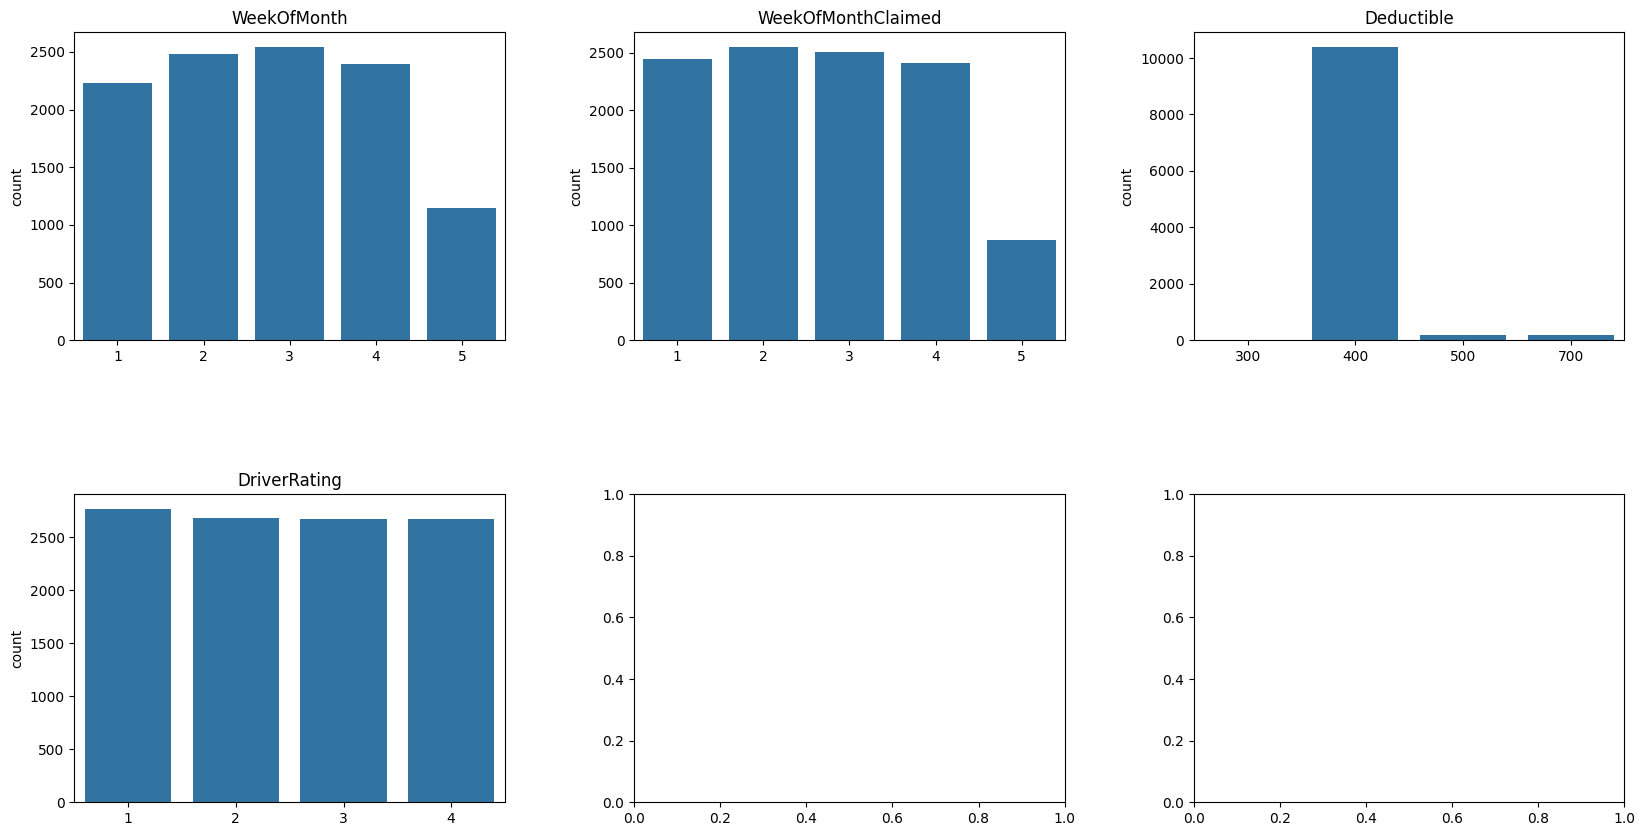

In [ ]:
# En este apartado solamente se dará tratamiento a las variables numéricas
# que funcionan como categóricas ordinales.

# Se hace una lista de todas las variables numéricas
num_cols = Xtrain.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(2,3, figsize=(20,10)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(Xtrain[num_cols], axes):
  #sns.histplot(x = Xtrain[col], kde = True, ax=ax, bins=10) # En lugar de histograma se grafica el conteo puesto que son variables numéricas con función de categóricas
  sns.countplot(x = Xtrain[col], ax=ax)
  ax.set(title=f'{col}', xlabel=None) # ---> Matplotlib
fig.subplots_adjust(hspace=.5)



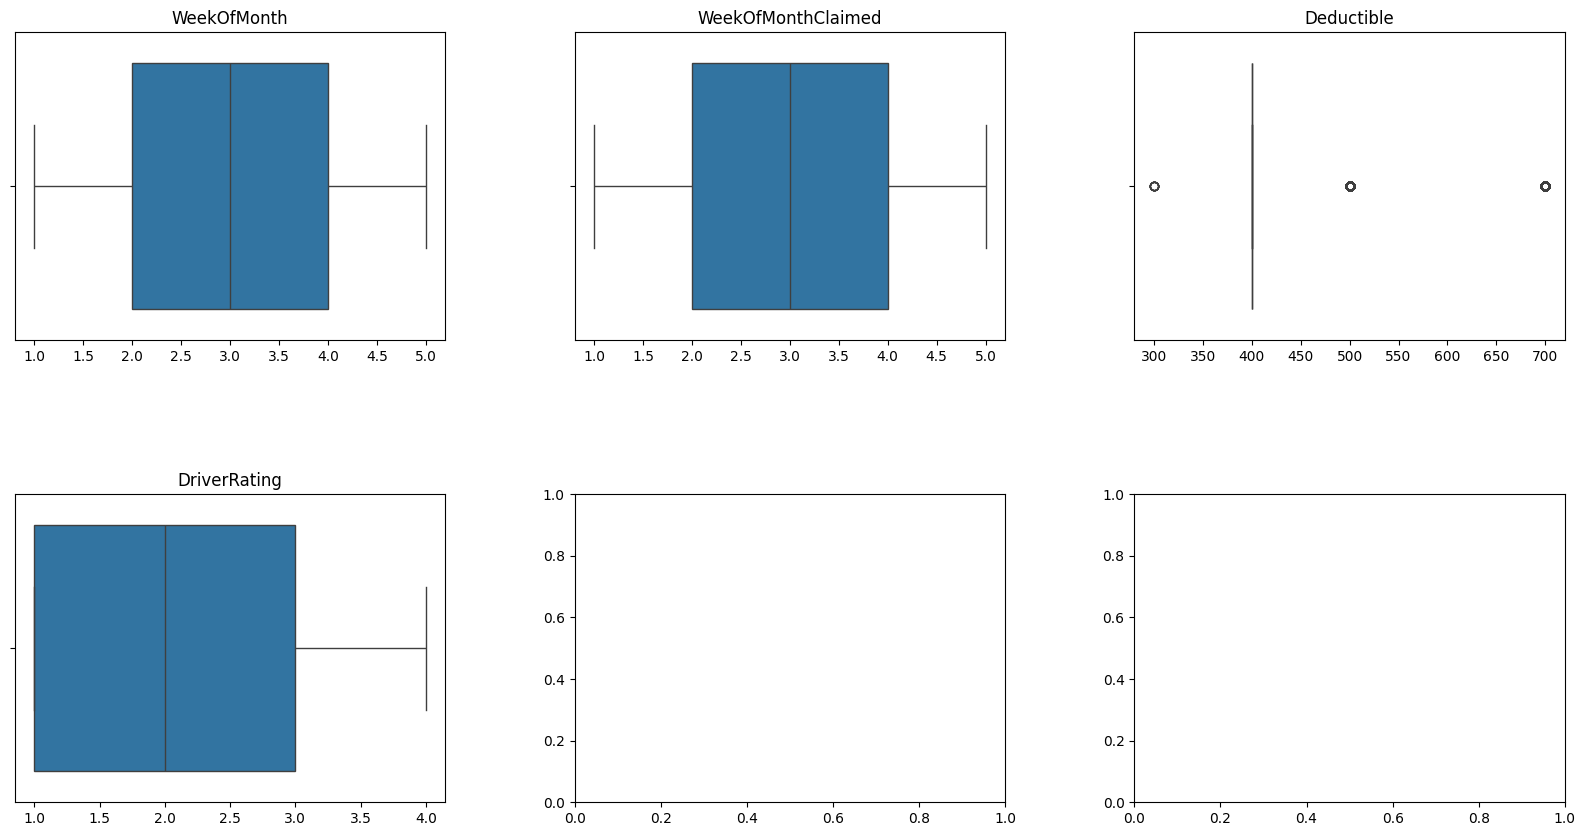

In [ ]:
# En este apartado solamente se dará tratamiento a las variables numéricas
# que funcionan como categóricas ordinales.

# Se hace una lista de todas las variables numéricas
num_cols = Xtrain.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(2,3, figsize=(20,10)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(Xtrain[num_cols], axes):
  sns.boxplot(x=df[col], ax=ax) # ---> Seaborn
  ax.set(title=f'{col}', xlabel=None) # ---> Matplotlib
fig.subplots_adjust(hspace=.5)

<ipython-input-25-e2130be5aeff>:36: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  num_cols_valid = [col for col in num_cols if col in Xtrain.columns and Xtrain[col].dtype in [np.number, 'int64', 'float64']]


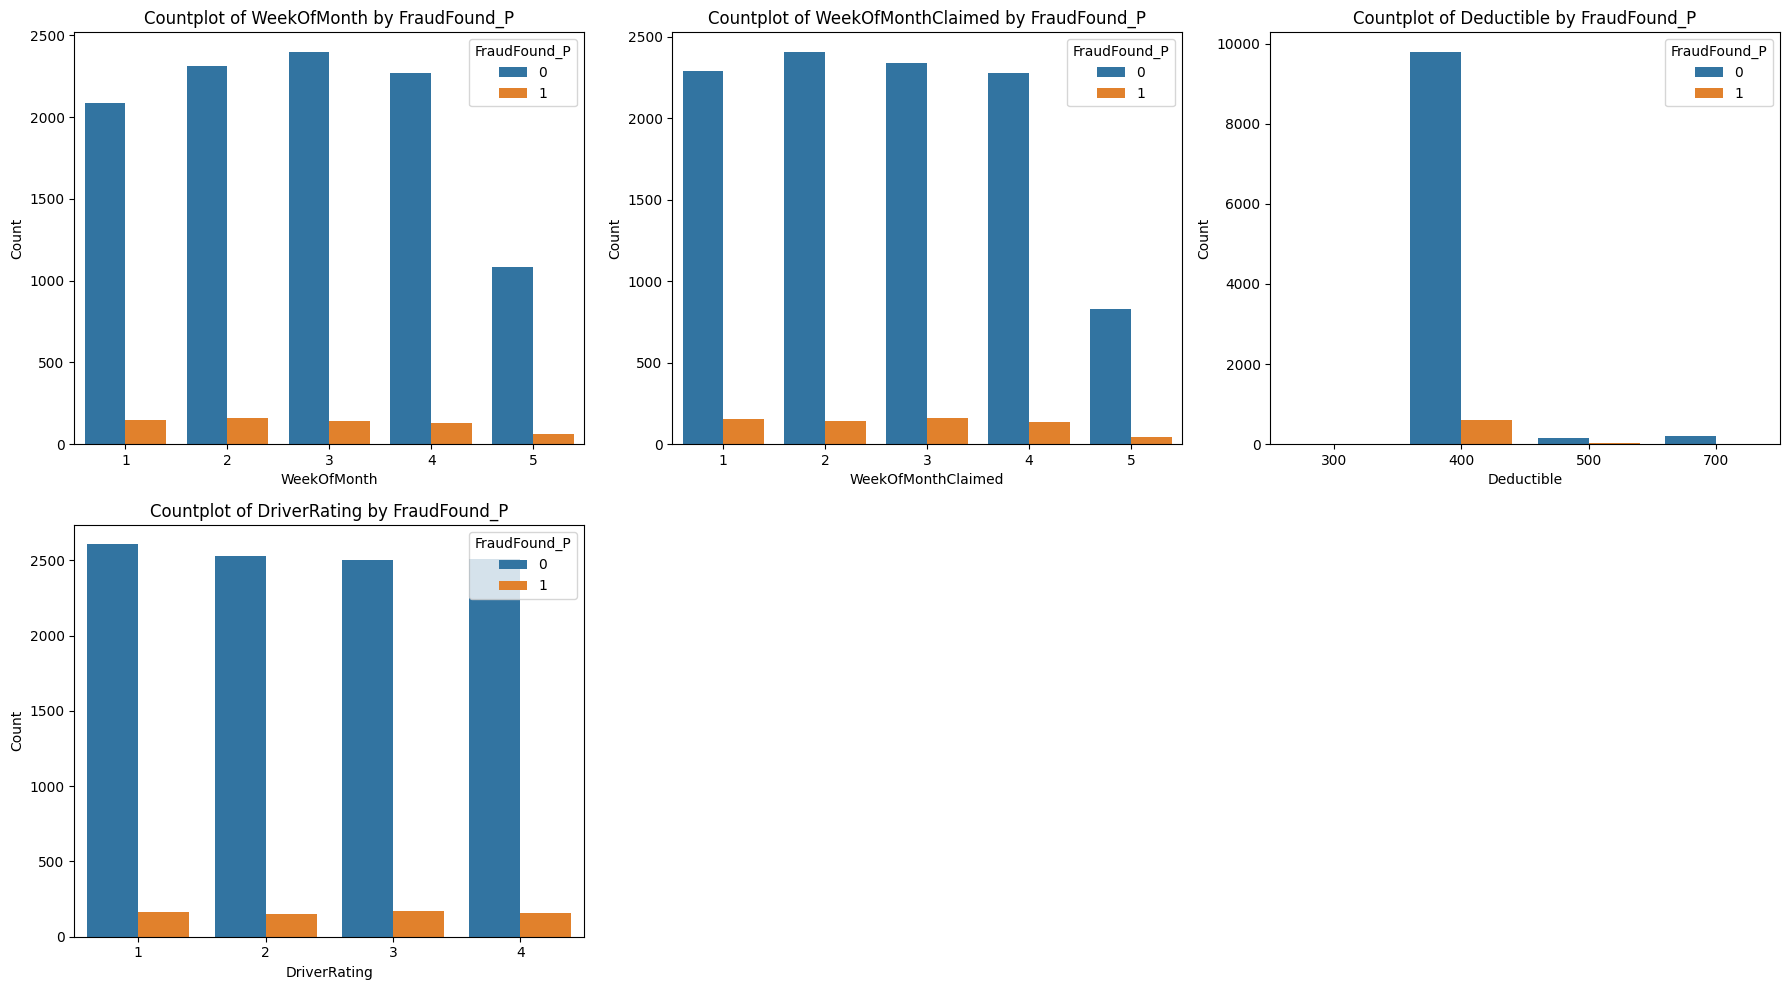

In [ ]:
# prompt: 'num_cols' is a list of numeric variables in dataframe 'Xtrain'. Can you create a script to plot a countplot of these variables where 'ytrain' is 0 or 1

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Assuming Xtrain, ytrain, and num_cols are already defined from the preceding code
# and ytrain is a pandas DataFrame with a single column named 'FraudFound_P'

# Create a single dataframe for plotting by combining Xtrain and ytrain
df_plot = pd.concat([Xtrain, ytrain], axis=1)

# Filter the DataFrame for rows where FraudFound_P is 0 or 1
df_plot_filtered = df_plot[df_plot['FraudFound_P'].isin([0, 1])]

# Ensure num_cols only contains columns present in Xtrain and are numeric
num_cols_valid = [col for col in num_cols if col in Xtrain.columns and Xtrain[col].dtype in [np.number, 'int64', 'float64']]


# Determine the number of rows and columns for subplots
n_cols = 3 # You can adjust the number of columns as needed
n_rows = (len(num_cols_valid) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.ravel() # Flatten the axes array for easy iteration

# Iterate through the valid numeric columns and plot countplots
for i, col in enumerate(num_cols_valid):
    sns.countplot(data=df_plot_filtered, x=col, hue='FraudFound_P', ax=axes[i])
    axes[i].set_title(f'Countplot of {col} by FraudFound_P')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='FraudFound_P')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<ipython-input-26-aefe24cfc052>:10: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  num_cols_valid = [col for col in num_cols if col in Xtrain.columns and Xtrain[col].dtype in [np.number, 'int64', 'float64']]


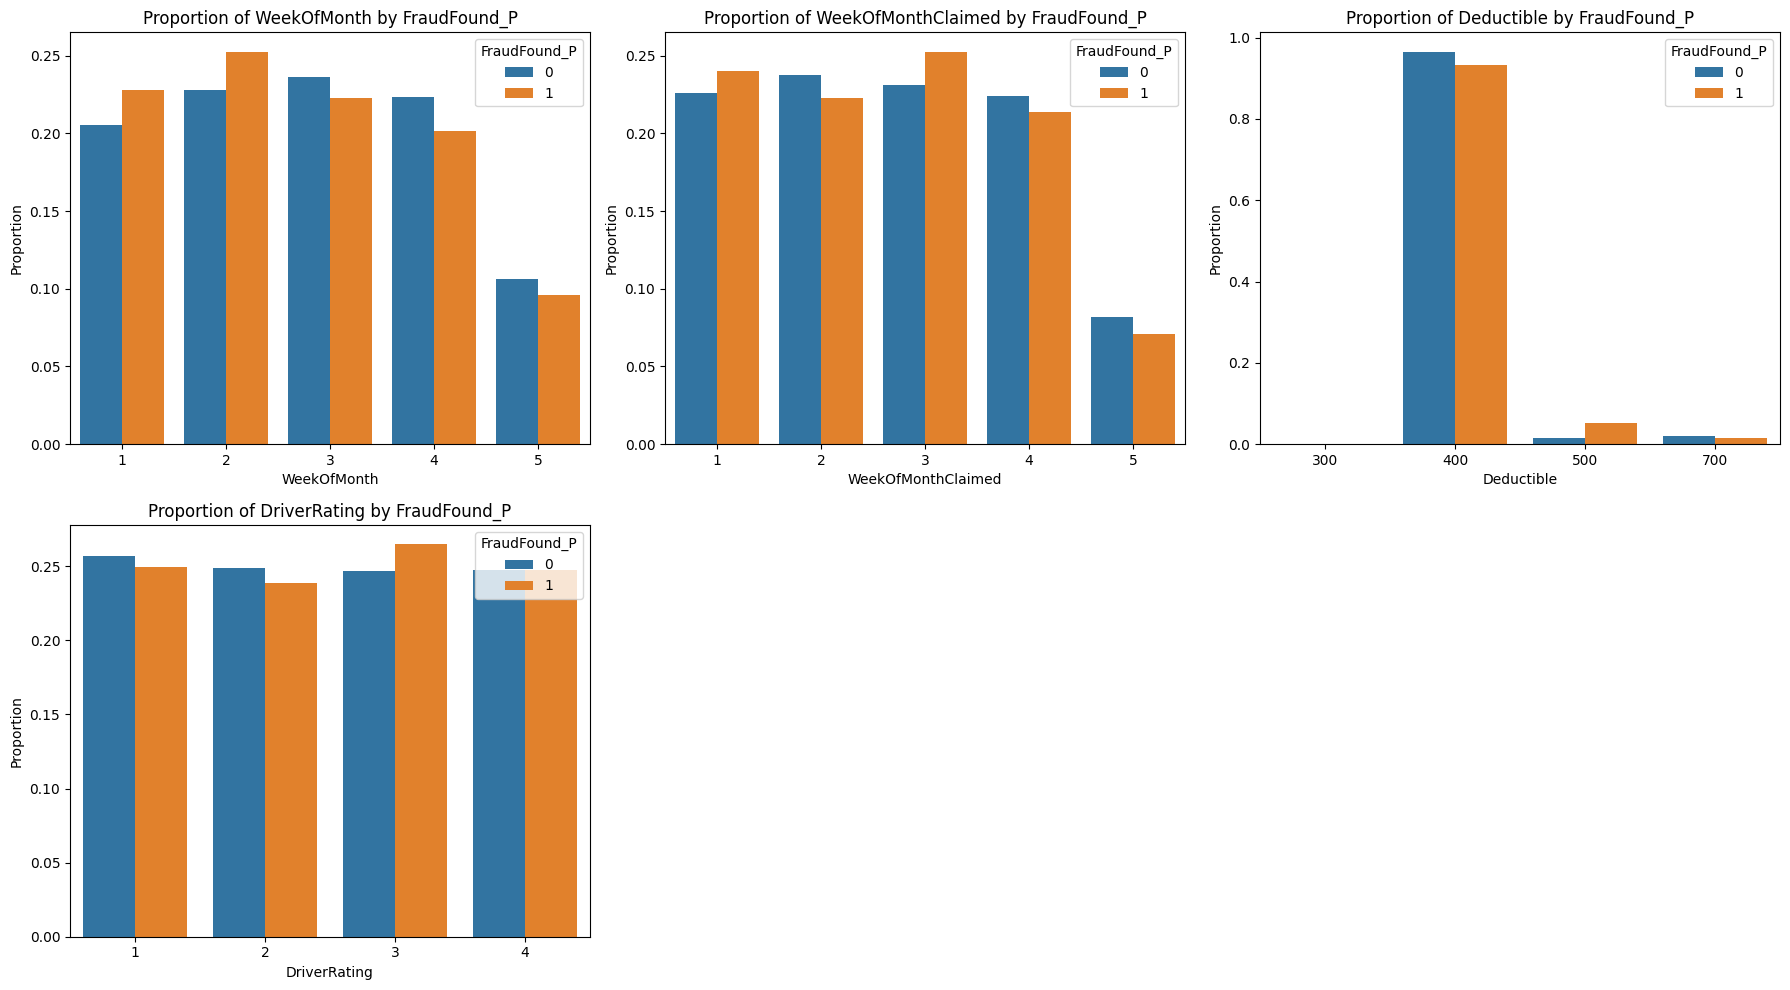

In [ ]:
# Modify the countplot to show proportions instead of raw counts

# Create a single dataframe for plotting by combining Xtrain and ytrain
df_plot = pd.concat([Xtrain, ytrain], axis=1)

# Filter the DataFrame for rows where FraudFound_P is 0 or 1
df_plot_filtered = df_plot[df_plot['FraudFound_P'].isin([0, 1])]

# Ensure num_cols only contains columns present in Xtrain and are numeric
num_cols_valid = [col for col in num_cols if col in Xtrain.columns and Xtrain[col].dtype in [np.number, 'int64', 'float64']]

# Determine the number of rows and columns for subplots
n_cols = 3 # You can adjust the number of columns as needed
n_rows = (len(num_cols_valid) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.ravel() # Flatten the axes array for easy iteration

# Iterate through the valid numeric columns and plot countplots with proportions
for i, col in enumerate(num_cols_valid):
    # Calculate the proportion for each category within each FraudFound_P group
    proportions = df_plot_filtered.groupby('FraudFound_P')[col].value_counts(normalize=True).rename('proportion').reset_index()

    # Plot the proportions using a bar plot
    sns.barplot(data=proportions, x=col, y='proportion', hue='FraudFound_P', ax=axes[i])

    axes[i].set_title(f'Proportion of {col} by FraudFound_P')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='FraudFound_P')

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**a) Con base a estos gráficos ¿qué tipo de transformaciones sugieres llevar a cabo en dichas variables?**


Puesto que los gráficos muestran que algunas variables se encuentran sesgadas, se aplicará una transformación exponencial o quantile transformer (se hará la prueba con ambas) para procurar que tengan una distribución gaussiana.

Por otra parte, las escalas de todas las variables son muy diferentes entre sí, por lo cual se podría aplicar junto con la transformación exponencial, una estandarización, para que todas las variables se encuentren dentro del mismo rango. En el caso del quantile transformer, los valores quedan escalados aproximadamente al mismo rango para todas las variables.

Finalmente cabe destacar que para la variable **'Deductible'** <Mark>la mayoría de los valores son 400 y solamente hay unos cuantos valores de 300,500 y 700 por lo que probablemente también debería eliminarse del análisis</Mark>. Por el momento se dejará.

<br><br>
**i. Se aplican las transformaciones, evitando el
filtrado de información (data-leakage). Estas nuevas variables
transformadas se llamarán XtrainT, XvalT y XtestT.**

Para evitar el filtrado de información, se aplica el "fit" del conjunto de entrenamiento para transformar los conjuntos de entrenamiento, validación y prueba.

In [ ]:
# Este código transforma los datos con Yeo-Johnson
pt = PowerTransformer().set_output(transform="pandas")
pt.fit(Xtrain[num_cols])
PowerTransformer(method='yeo-johnson', standardize=True)
XtrainT = pt.transform(Xtrain[num_cols])
XvalT = pt.transform(Xval[num_cols])
XtestT = pt.transform(Xtest[num_cols])


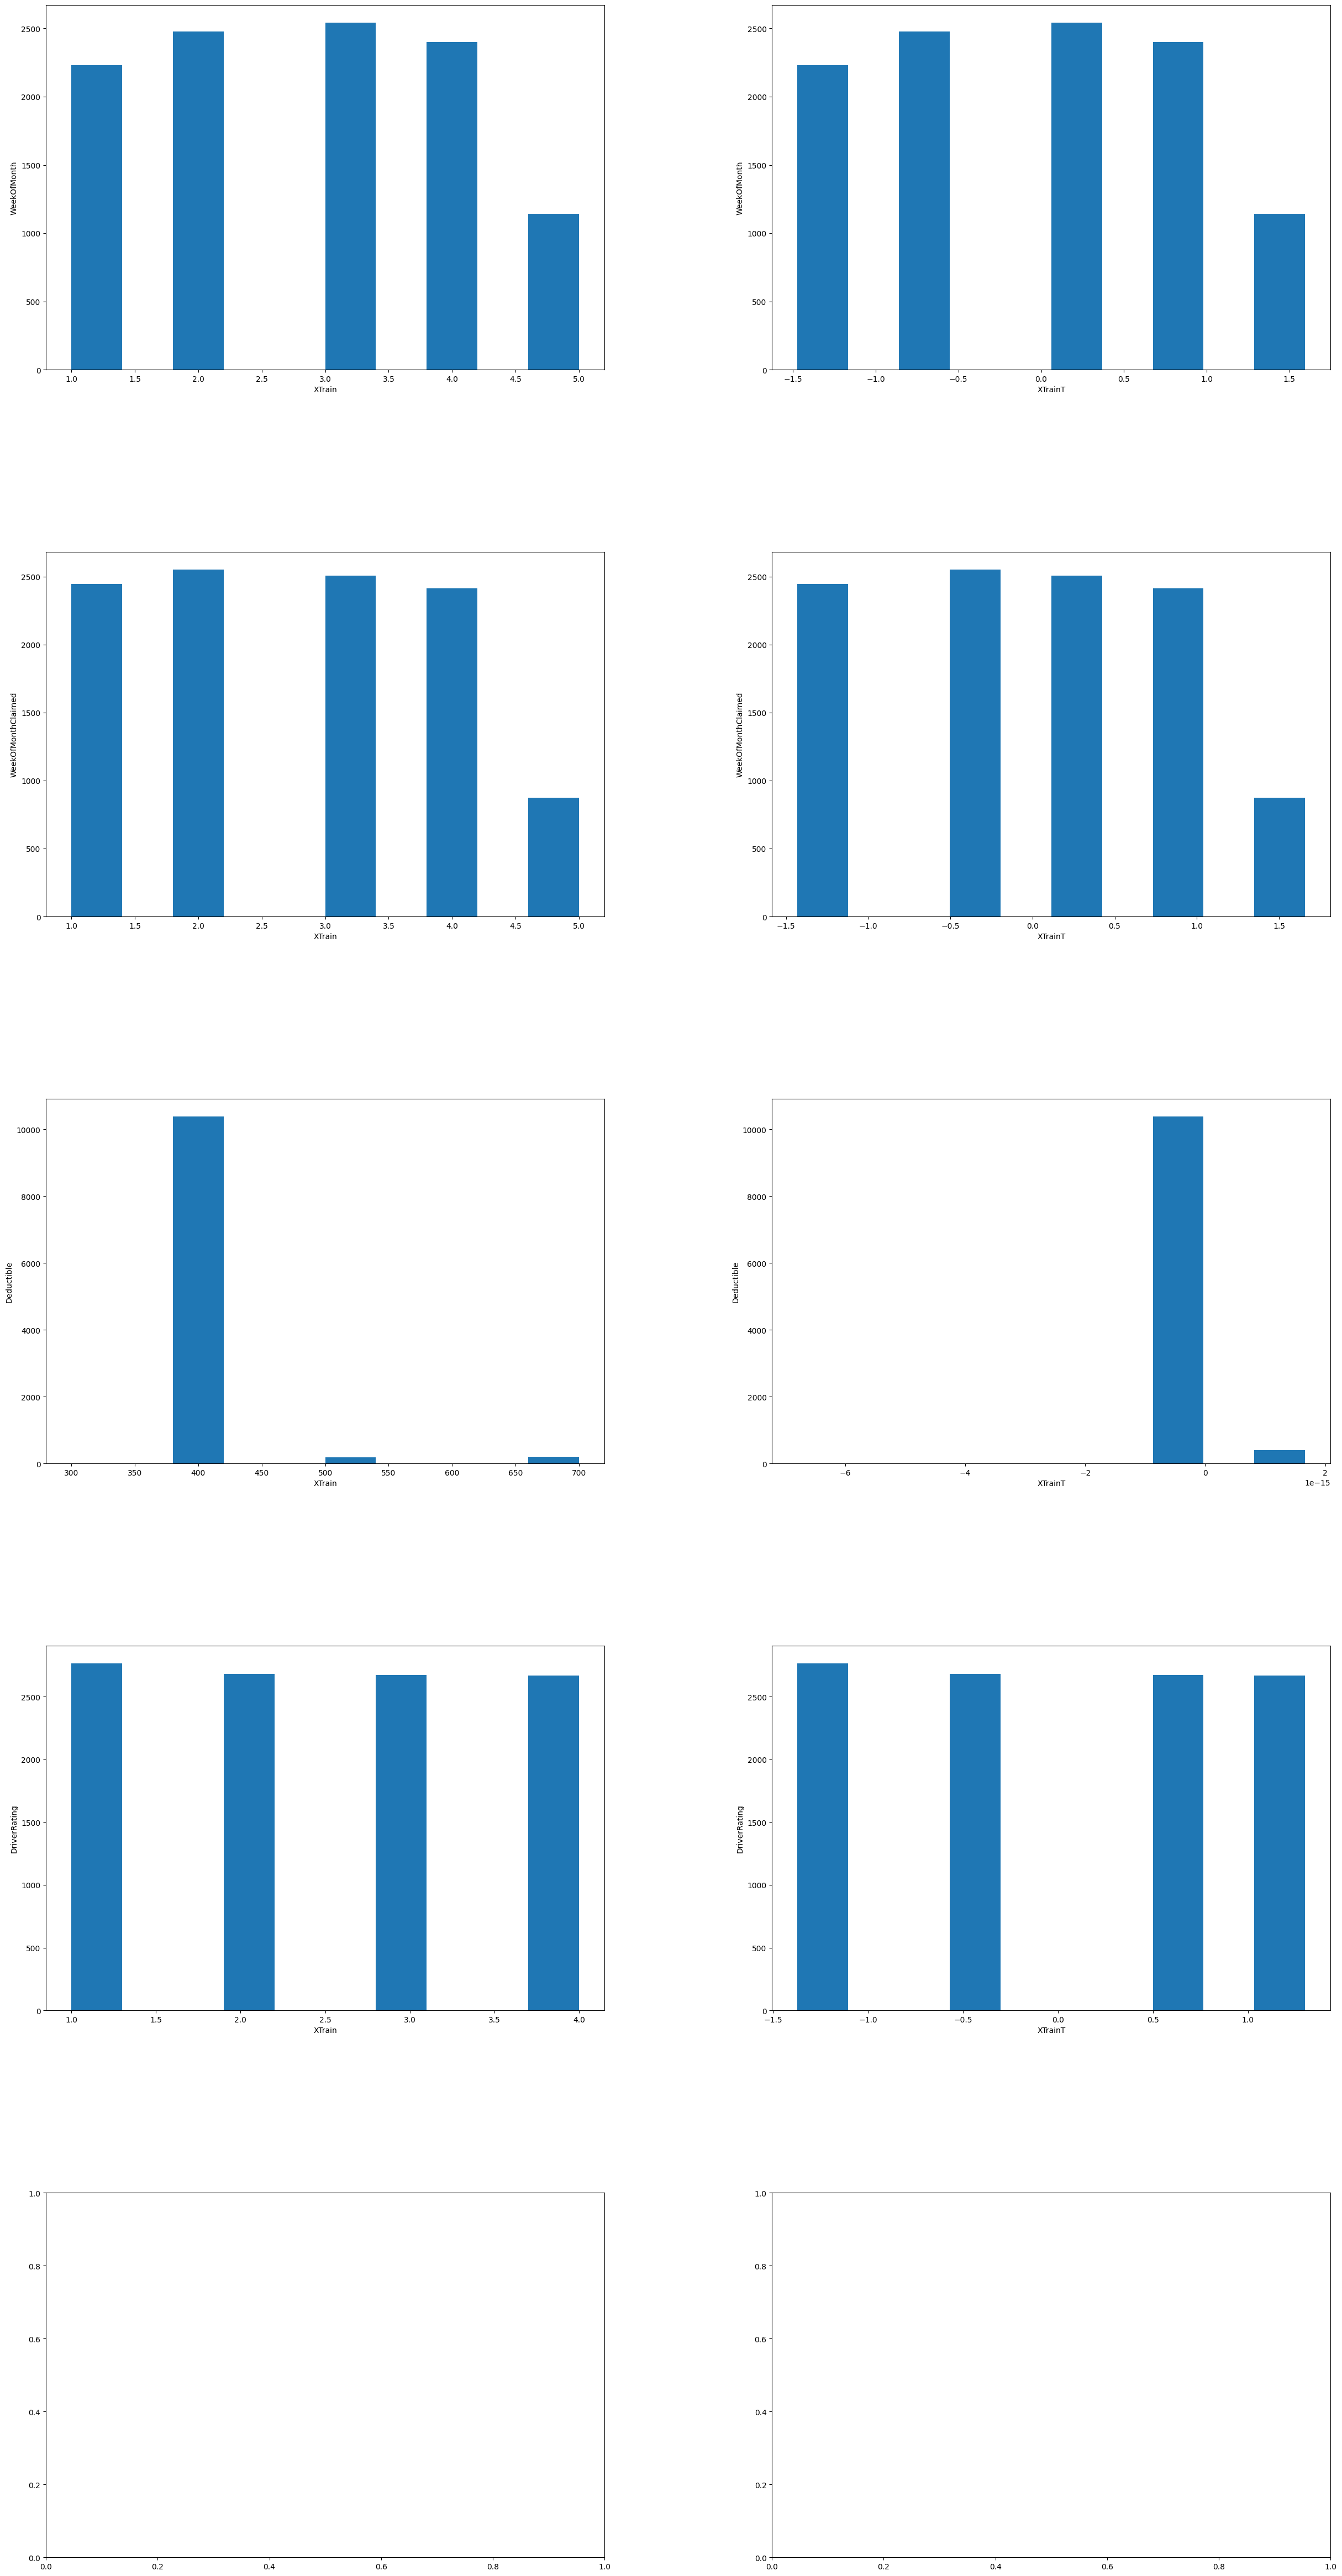

In [ ]:
fig, axes = plt.subplots(5,2, figsize=(30,60)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
i = 0
for col, ax in zip(Xtrain[num_cols], axes):
  i = i + 1
  plt.subplot(5,2,i)
  plt.hist(Xtrain[col], bins=10)
  #sns.countplot(x = Xtrain[col], ax=ax)
  plt.ylabel(f'{col}')
  plt.xlabel("XTrain")
  i = i + 1
  plt.subplot(5,2,i)
  plt.hist(XtrainT[col], bins=10)
  #sns.countplot(x = XtrainT[col], ax=ax)
  plt.ylabel(f'{col}')
  plt.xlabel("XTrainT")
fig.subplots_adjust(hspace=.5)

In [ ]:
# Este código transforma los datos con Quantile Transformer
qt = QuantileTransformer(n_quantiles=10, output_distribution="normal", random_state=1).set_output(transform="pandas")
qt.fit(Xtrain[num_cols])
#PowerTransformer(method='yeo-johnson', standardize=True)
XtrainT = qt.transform(Xtrain[num_cols])
XvalT = qt.transform(Xval[num_cols])
XtestT = qt.transform(Xtest[num_cols])

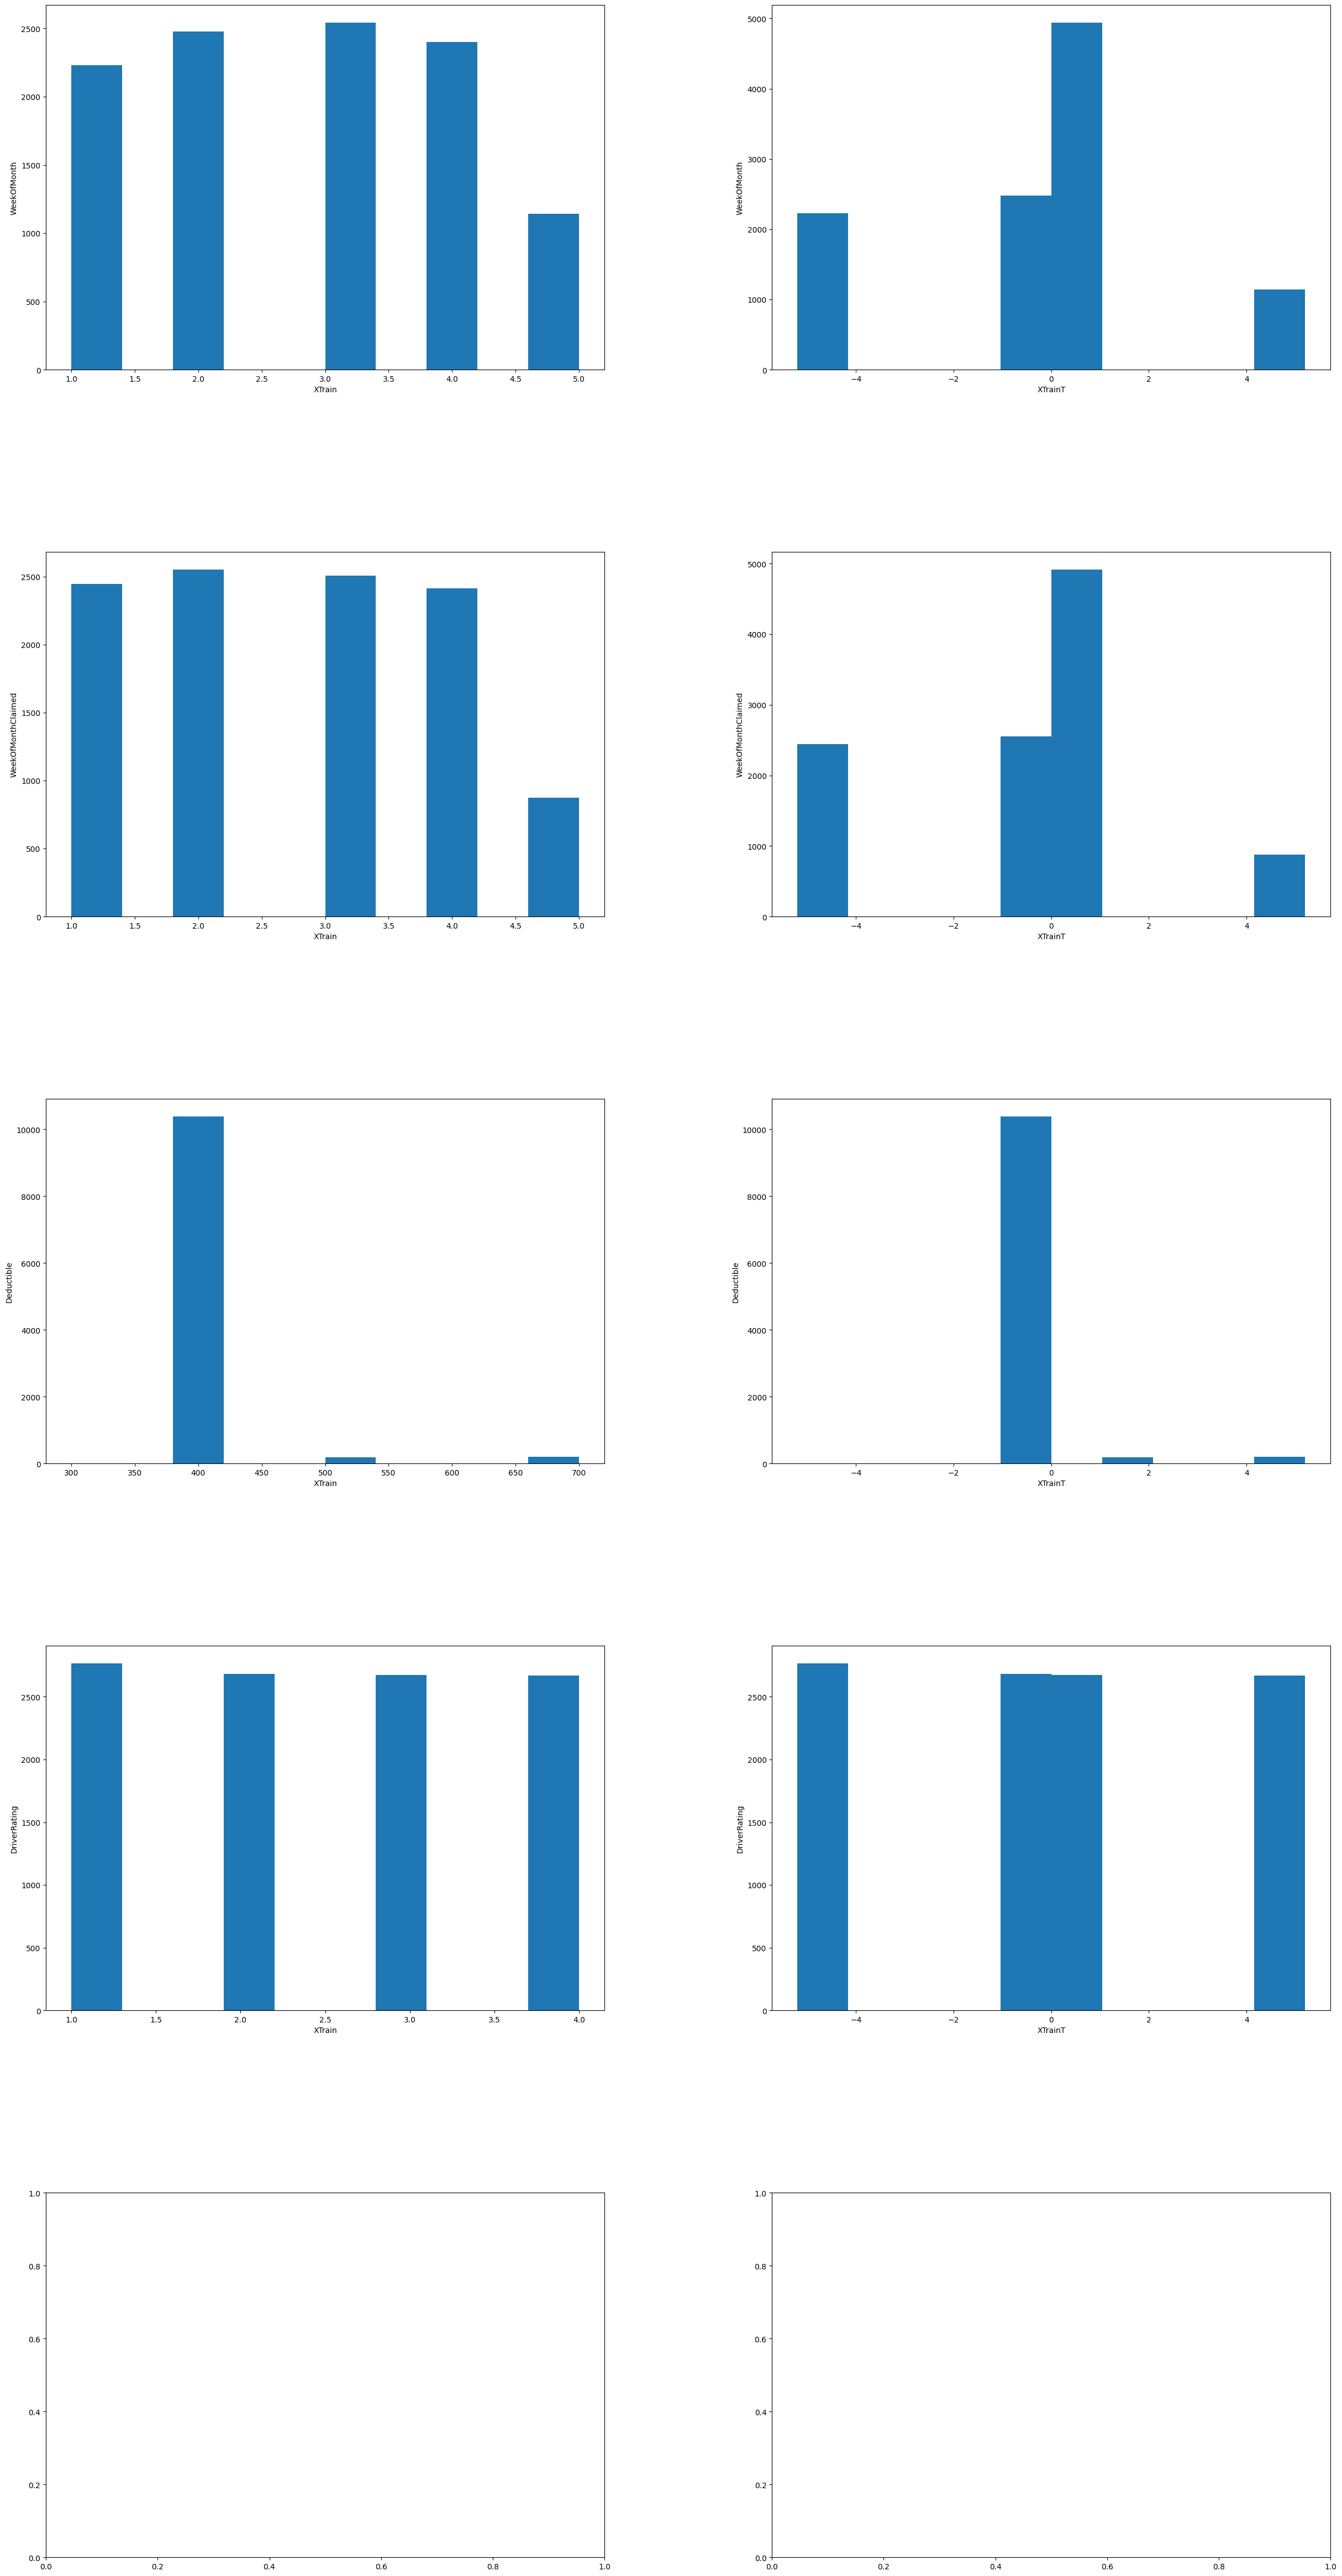

In [ ]:
fig, axes = plt.subplots(5,2, figsize=(30,60)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
i = 0
for col, ax in zip(Xtrain[num_cols], axes):
  i = i + 1
  plt.subplot(5,2,i)
  plt.hist(Xtrain[col], bins=10)
  plt.ylabel(f'{col}')
  plt.xlabel("XTrain")
  i = i + 1
  plt.subplot(5,2,i)
  plt.hist(XtrainT[col], bins=10)
  plt.ylabel(f'{col}')
  plt.xlabel("XTrainT")
fig.subplots_adjust(hspace=.5)

Al comparar los histogrmas de las variables originales vs. las transformadas, podemos ver que en general se logra una distribución más gaussiana aplicando la transformación quantile transformer


Una vez que se han transformado las variables numéricas para que tengan una distribución gaussiana, se les aplicará una transformación min-max para que se encuentren en el rango de 0 a 1 al igual que las binarias y las nominales cuando se transformen posteriormente

In [ ]:
# Este código transforma los datos con MinMaxScaler
scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(XtrainT[num_cols])

XtrainT = scaler.transform(XtrainT[num_cols])
XvalT = scaler.transform(XvalT[num_cols])
XtestT = scaler.transform(XtestT[num_cols])

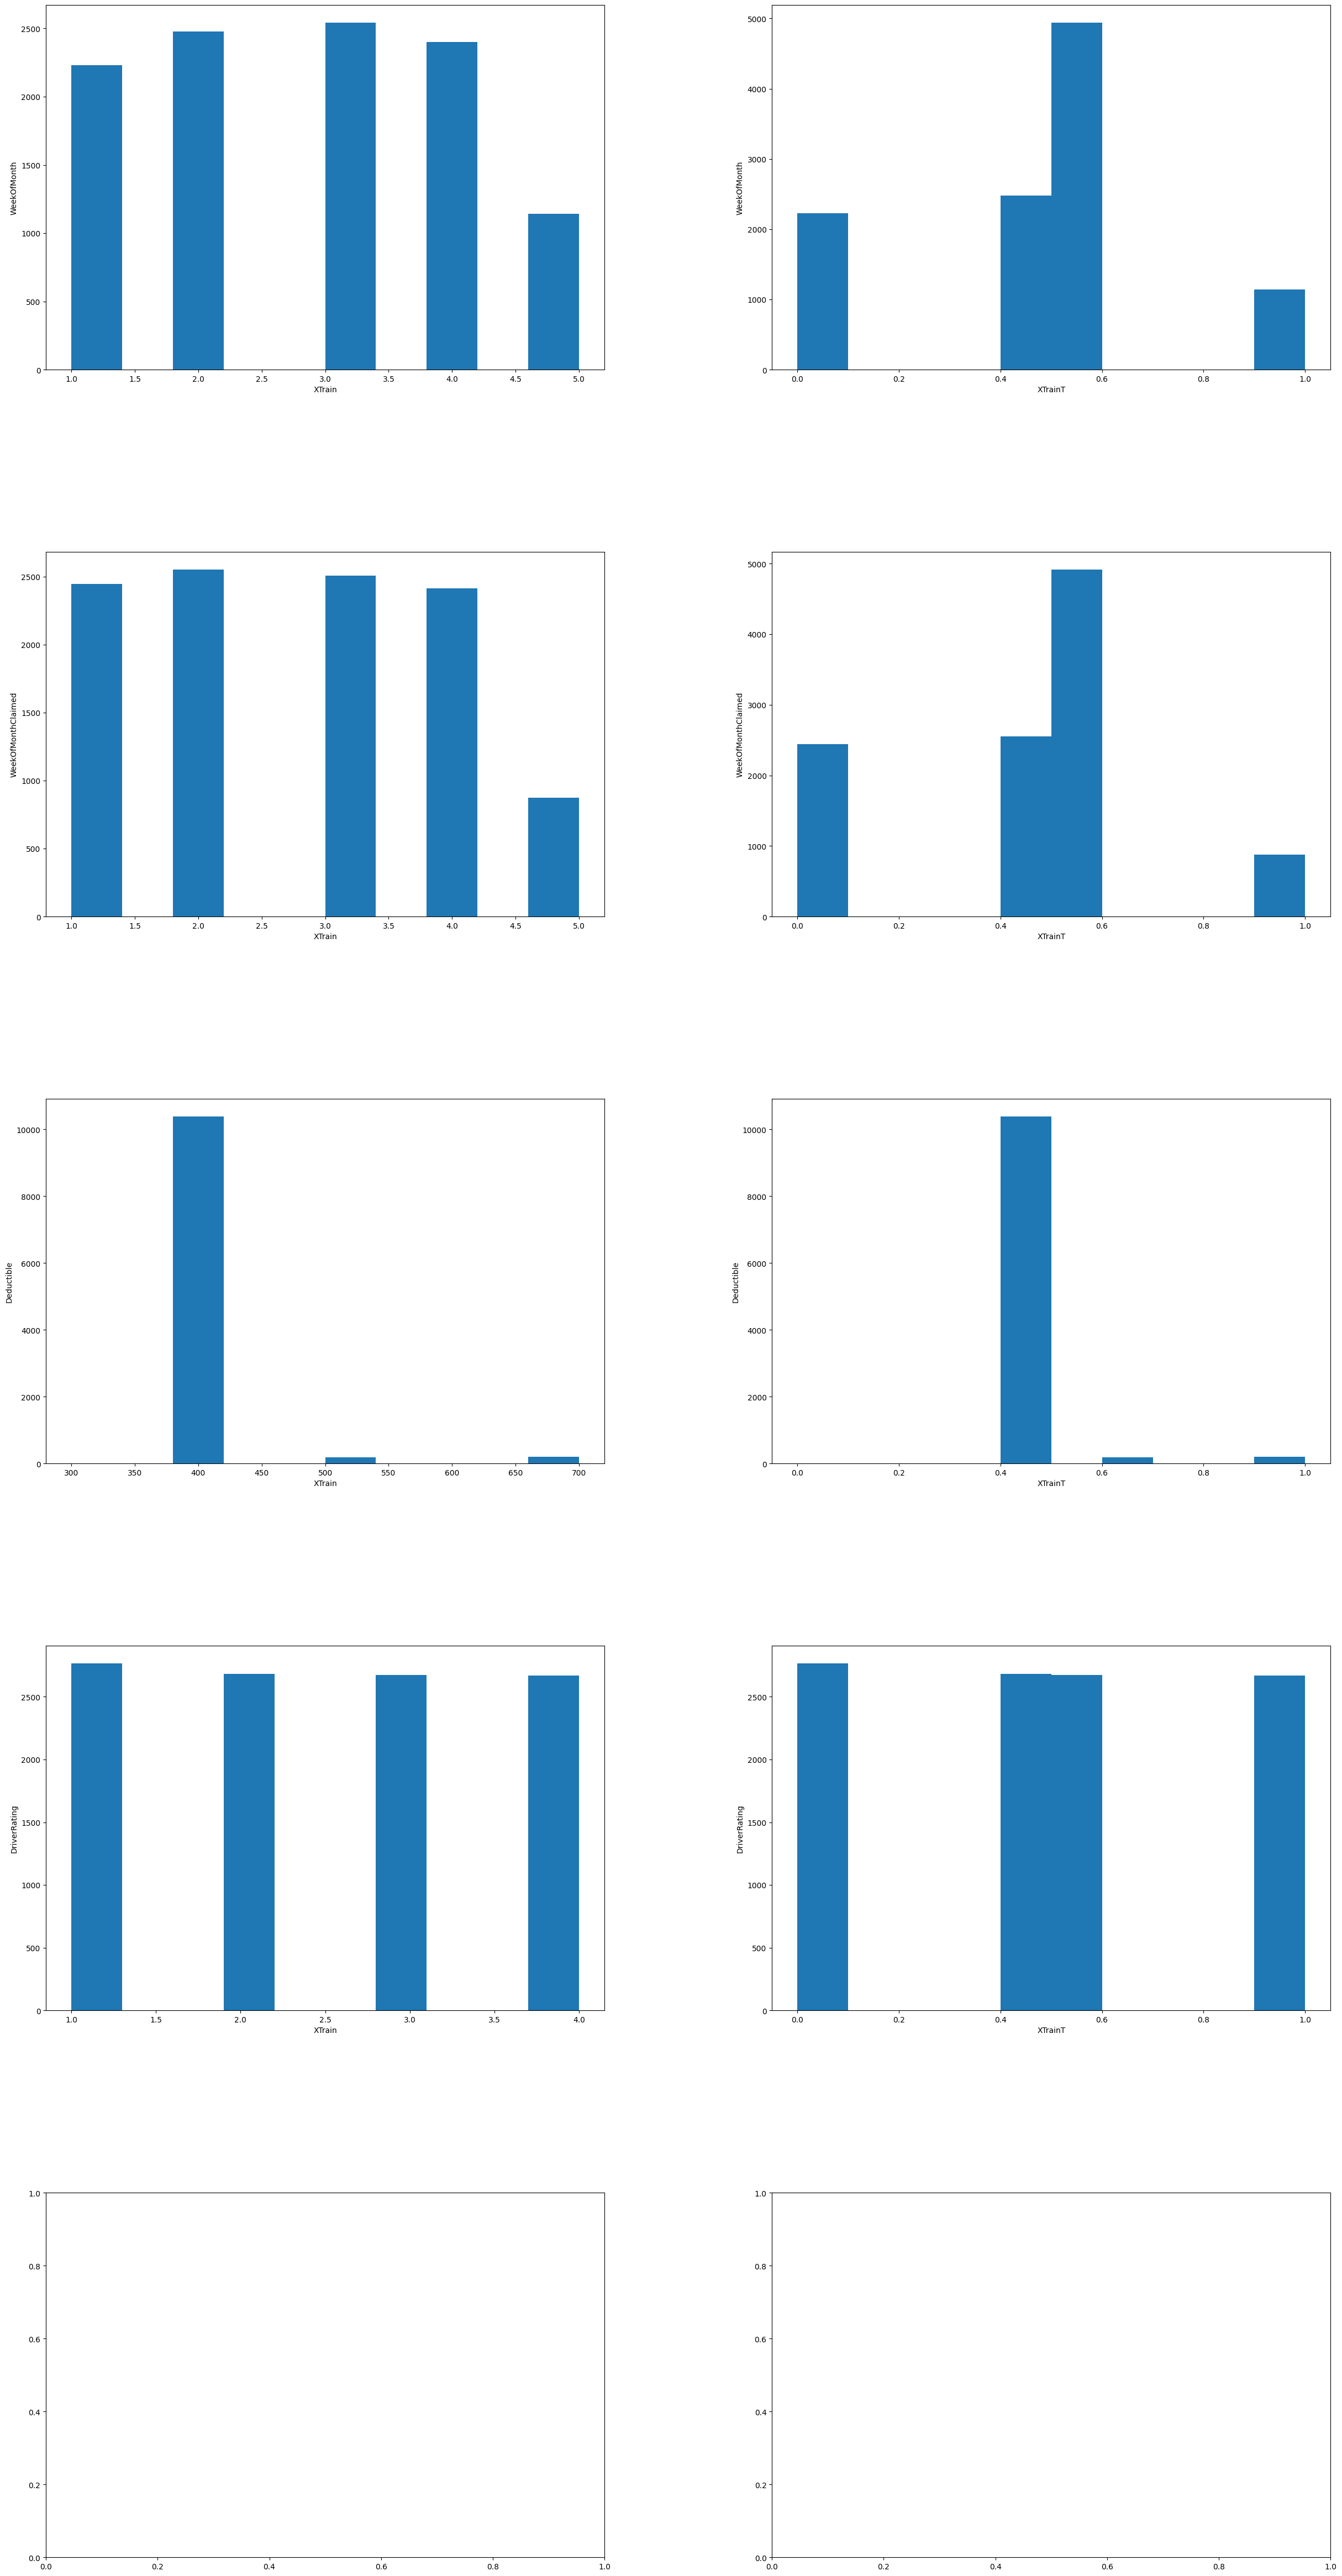

In [ ]:
fig, axes = plt.subplots(5,2, figsize=(30,60)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
i = 0
for col, ax in zip(Xtrain[num_cols], axes):
  i = i + 1
  plt.subplot(5,2,i)
  plt.hist(Xtrain[col], bins=10)
  plt.ylabel(f'{col}')
  plt.xlabel("XTrain")
  i = i + 1
  plt.subplot(5,2,i)
  plt.hist(XtrainT[col], bins=10)
  plt.ylabel(f'{col}')
  plt.xlabel("XTrainT")
fig.subplots_adjust(hspace=.5)

**5) Se aplica la transformación LabelEncoder() de sklearn a todas las variables binarias, evitando el filtrado de información.**

In [ ]:
# Las variables binarias son 'FraudFound_P', 'AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent' y 'AgentType'
# 'FraudFound_P' está en Y, 'AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent' y 'AgentType' están en X

# Se crea un dataframe auxiliar para aplicarle el LabelEncoder

#Aunque la variable 'FraudFound_P' ya se encuentra codificada con 0 y 1, se conserva en el código para no modifcarlo

df_train_le = pd.concat([ytrain['FraudFound_P'], Xtrain['AccidentArea'], Xtrain['Sex'], Xtrain['Fault'], Xtrain['PoliceReportFiled'], Xtrain['WitnessPresent'], Xtrain['AgentType']], axis=1)
df_val_le = pd.concat([yval['FraudFound_P'], Xval['AccidentArea'], Xval['Sex'], Xval['Fault'], Xval['PoliceReportFiled'], Xval['WitnessPresent'], Xval['AgentType']], axis=1)
df_test_le = pd.concat([ytest['FraudFound_P'], Xtest['AccidentArea'], Xtest['Sex'], Xtest['Fault'], Xtest['PoliceReportFiled'], Xtest['WitnessPresent'], Xtest['AgentType']], axis=1)

display(df_train_le,df_val_le,df_test_le)

,FraudFound_P,AccidentArea,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType
12012,0,Urban,Male,Policy Holder,No,No,External
1149,0,Urban,Male,Policy Holder,No,No,External
11427,0,Urban,Male,Policy Holder,No,No,External
3476,0,Urban,Male,Third Party,No,No,External
6678,0,Urban,Male,Policy Holder,No,No,External
...,...,...,...,...,...,...,...
8581,0,Urban,Male,Third Party,No,No,External
2782,0,Urban,Male,Third Party,No,No,External
14774,0,Urban,Male,Policy Holder,No,No,External
9828,0,Urban,Male,Policy Holder,No,No,External


,FraudFound_P,AccidentArea,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType
9475,0,Urban,Male,Policy Holder,No,No,External
3691,0,Urban,Male,Policy Holder,No,No,External
4061,0,Urban,Male,Third Party,No,No,External
3096,0,Urban,Male,Policy Holder,No,No,External
7021,0,Urban,Male,Policy Holder,No,No,External
...,...,...,...,...,...,...,...
9892,0,Urban,Male,Policy Holder,No,No,External
4072,0,Urban,Male,Third Party,No,No,External
4342,0,Urban,Male,Policy Holder,No,No,External
4484,0,Urban,Male,Third Party,No,No,External


,FraudFound_P,AccidentArea,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType
9698,0,Urban,Male,Policy Holder,No,No,External
10643,0,Urban,Female,Policy Holder,No,No,External
13129,1,Rural,Male,Policy Holder,No,No,External
3127,0,Rural,Male,Third Party,No,No,External
11710,0,Urban,Male,Policy Holder,No,No,External
...,...,...,...,...,...,...,...
4138,0,Urban,Male,Policy Holder,No,Yes,External
1240,0,Urban,Male,Policy Holder,No,No,External
13396,0,Urban,Male,Third Party,No,No,External
6082,0,Urban,Female,Third Party,No,No,External


In [ ]:
# Se definen los dataframes transformados para la variabe de salida 'FraudFound_P'
ytrainT = ytrain
yvalT = yval
ytestT = ytest

# Se tranforman las variables binarias en el dataframe auxiliar

le = LabelEncoder()
bin_cols = ['FraudFound_P', 'AccidentArea', 'Sex', 'Fault', 'PoliceReportFiled', 'WitnessPresent', 'AgentType']

for col in bin_cols:
  le.fit(df_train_le[col])
  LabelEncoder()
  if col == 'FraudFound_P':
    ytrainT[col] = le.transform(df_train_le[col])
    yvalT[col] = le.transform(df_val_le[col])
    ytestT[col] = le.transform(df_test_le[col])
  else:
    XtrainT[col] = le.transform(df_train_le[col])
    XvalT[col] = le.transform(df_val_le[col])
    XtestT[col] = le.transform(df_test_le[col])

# Se eliminan los dataframes auxiliares

del df_train_le
del df_val_le
del df_test_le

display(ytrainT, yvalT, ytestT, XtrainT, XvalT, XtestT)

,FraudFound_P
12012,0
1149,0
11427,0
3476,0
6678,0
...,...
8581,0
2782,0
14774,0
9828,0


,FraudFound_P
9475,0
3691,0
4061,0
3096,0
7021,0
...,...
9892,0
4072,0
4342,0
4484,0


,FraudFound_P
9698,0
10643,0
13129,1
3127,0
11710,0
...,...
4138,0
1240,0
13396,0
6082,0


,WeekOfMonth,WeekOfMonthClaimed,Deductible,DriverRating,AccidentArea,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType
12012,0.443314,0.472860,0.5,0.52714,1,1,0,0,0,0
1149,0.513435,0.527140,0.5,0.52714,1,1,0,0,0,0
11427,0.513435,0.593033,0.5,0.47286,1,1,0,0,0,0
3476,0.443314,0.527140,0.5,0.47286,1,1,1,0,0,0
6678,0.513435,0.527140,0.5,0.52714,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8581,0.000000,0.472860,0.5,0.52714,1,1,1,0,0,0
2782,0.593033,1.000000,0.5,0.52714,1,1,1,0,0,0
14774,0.513435,0.527140,0.5,0.00000,1,1,0,0,0,0
9828,0.443314,0.593033,0.5,0.47286,1,1,0,0,0,0


,WeekOfMonth,WeekOfMonthClaimed,Deductible,DriverRating,AccidentArea,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType
9475,0.513435,0.527140,0.5,0.52714,1,1,0,0,0,0
3691,0.000000,0.472860,0.5,1.00000,1,1,0,0,0,0
4061,0.593033,0.593033,1.0,1.00000,1,1,1,0,0,0
3096,0.513435,0.593033,0.5,0.00000,1,1,0,0,0,0
7021,0.593033,0.527140,0.5,1.00000,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9892,0.000000,0.472860,0.5,0.47286,1,1,0,0,0,0
4072,0.000000,0.472860,0.5,0.47286,1,1,1,0,0,0
4342,1.000000,0.000000,0.5,0.52714,1,1,0,0,0,0
4484,0.593033,0.593033,0.5,0.00000,1,1,1,0,0,0


,WeekOfMonth,WeekOfMonthClaimed,Deductible,DriverRating,AccidentArea,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType
9698,0.443314,0.472860,0.5,0.52714,1,1,0,0,0,0
10643,0.593033,0.593033,0.5,0.00000,1,0,0,0,0,0
13129,0.593033,0.000000,0.5,0.52714,0,1,0,0,0,0
3127,0.513435,0.593033,0.5,0.47286,0,1,1,0,0,0
11710,0.000000,0.527140,0.5,0.52714,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
4138,0.443314,0.527140,0.5,0.47286,1,1,0,0,1,0
1240,0.513435,0.527140,1.0,0.00000,1,1,0,0,0,0
13396,0.513435,0.593033,0.5,0.52714,1,1,1,0,0,0
6082,0.593033,0.593033,0.5,1.00000,1,0,1,0,0,0


**a) En particular, se obtine la distribución de las clases de la variable de salida "FraudFound_P". Con base a dicha distribución, ¿se puede considerar que existe un problema de datos no balanceados?**

<Axes: xlabel='FraudFound_P', ylabel='count'>

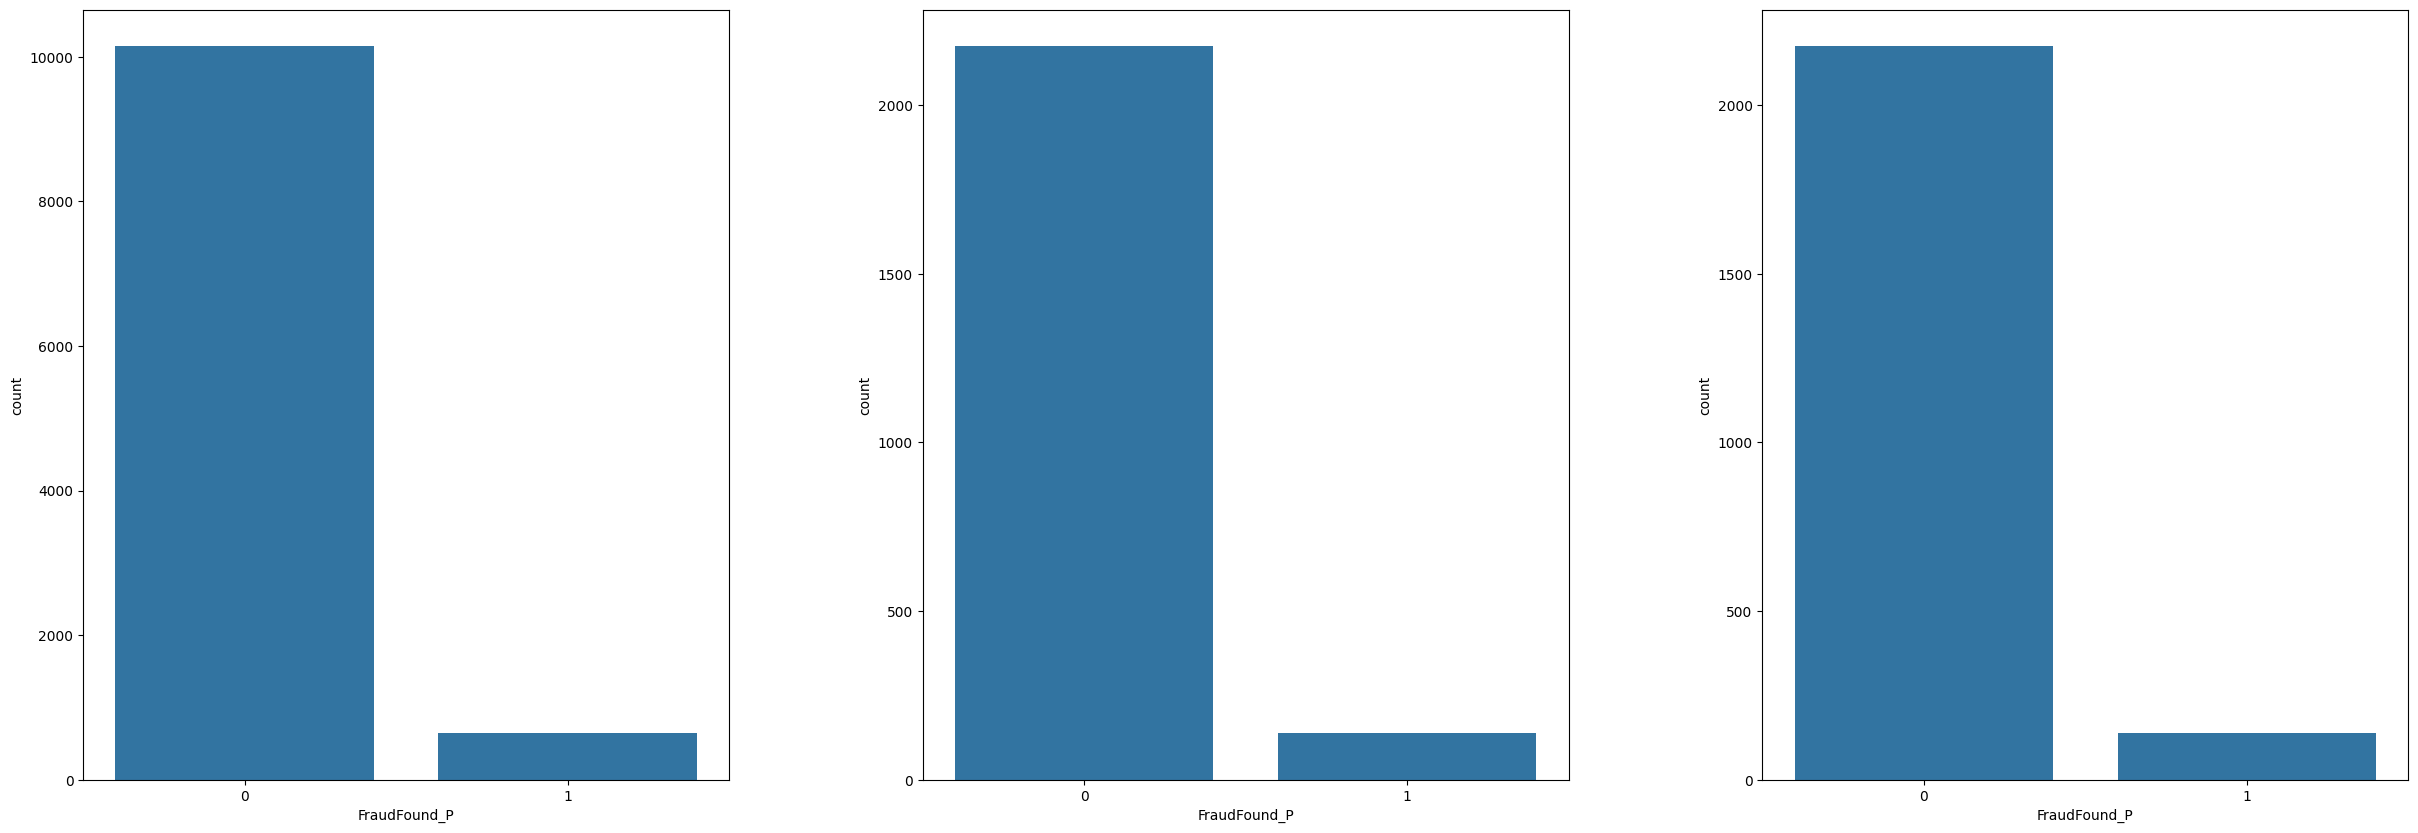

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(30,10)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()

plt.subplot(1,3,1)
sns.countplot(ytrainT, x='FraudFound_P')

plt.subplot(1,3,2)
sns.countplot(yvalT, x='FraudFound_P')

plt.subplot(1,3,3)
sns.countplot(ytestT, x='FraudFound_P')


<br><br>
Con base en la distribución, sí podemos considerar que tenemos un problema de datos no balanceados puesto que para la variable de salida "FraudFound_P", el valor de 0 (No) presenta una frequencia mucho mayor que la del valor de 1 (yes). Visualmente podemos ver en la gráfica que la relación se aproxima al 95% - 5%, que es un parámetro con el que se puede considerar <Mark>indudablemente que existe un problema de datos no balanceados.</Mark>
<br><br>

**6) Se realiza una inspección de las variables ordinales para determinar qué transformaciones aplicarles.**

La variables ordinales son: 'Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','AgeOfVehicle','AgeOfPolicyHolder','NumberOfSuppliments','AddressChange_Claim','NumberOfCars'
<br><br>
Se graficará el boxplot de estas variables para observar si hay valores atípicos
<br><br>
Se les aplicará la transformación OrdinalEncoder para definir sus respectivas categorías con los valores de 0, 1, 2, etc. según corresponda.
<br><br>
Posteriormente se les aplicará la misma transformación que a las variables numéricas (QuantileTransformer) para que tengan un rango similar al de las demás variables numéricas.

Cabe mencionar que está pendiente analizar la posibilidad de considerar la variable 'MaritalStatus' también como ordinal.

In [ ]:
!pip show seaborn

Name: seaborn
Version: 0.13.2
Summary: Statistical data visualization
Home-page: 
Author: 
Author-email: Michael Waskom <mwaskom@gmail.com>
License: 
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, pandas
Required-by: missingno


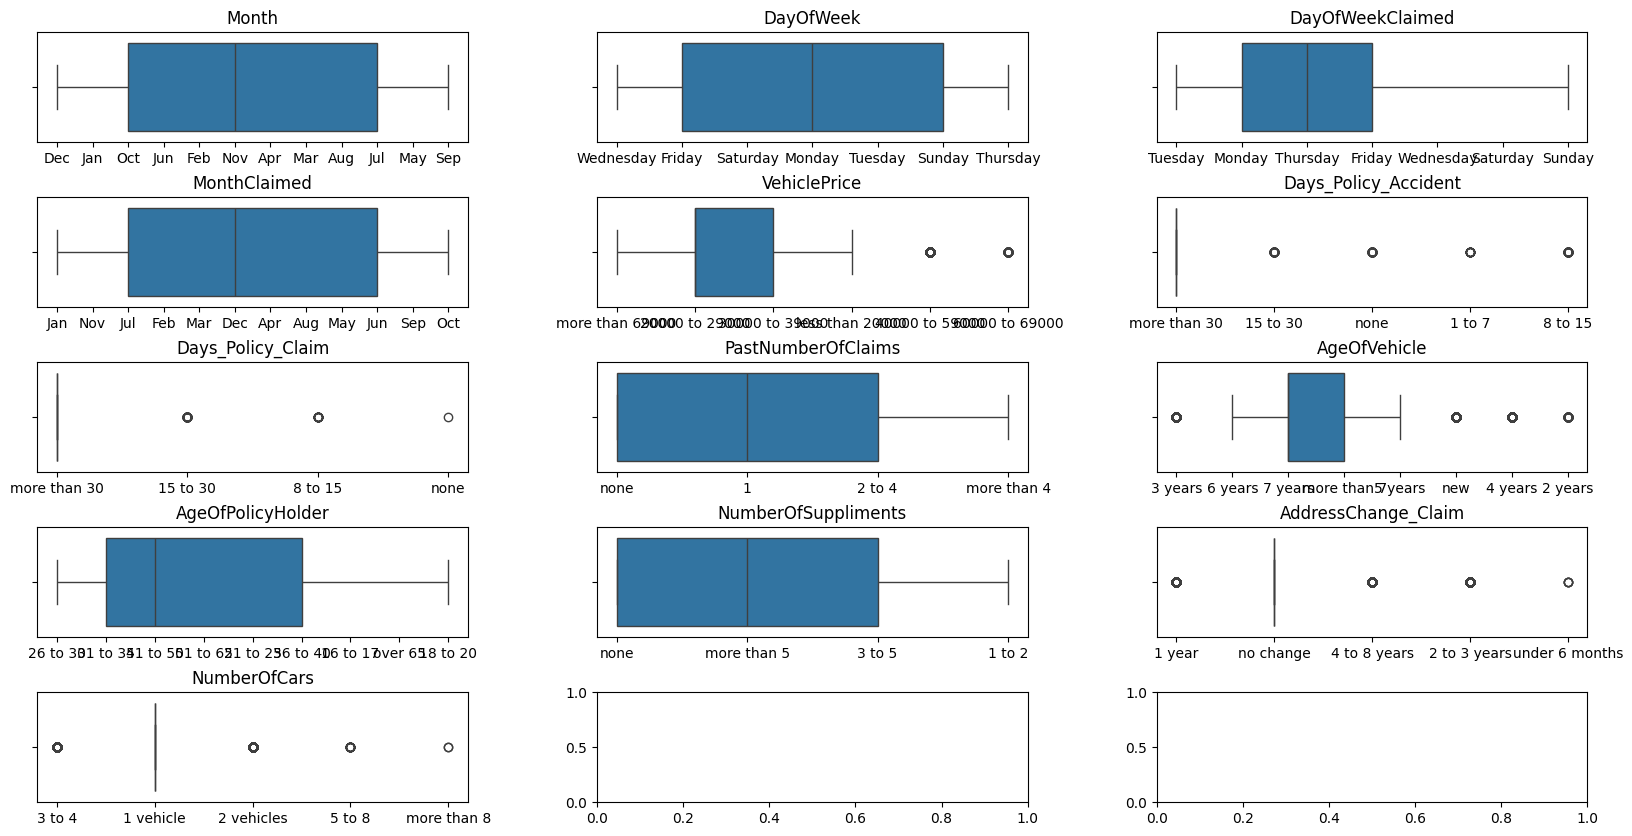

In [ ]:
#se definen la variables de entrada ordinales
ord_col = ['Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed','VehiclePrice',
           'Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','AgeOfVehicle',
           'AgeOfPolicyHolder','NumberOfSuppliments','AddressChange_Claim','NumberOfCars']

fig, axes = plt.subplots(5,3, figsize=(20,10)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()
for col, ax in zip(Xtrain[ord_col], axes):
  sns.boxplot(x=df[col], ax=ax) # ---> Seaborn
  ax.set(title=f'{col}', xlabel=None) # ---> Matplotlib
fig.subplots_adjust(hspace=.5)

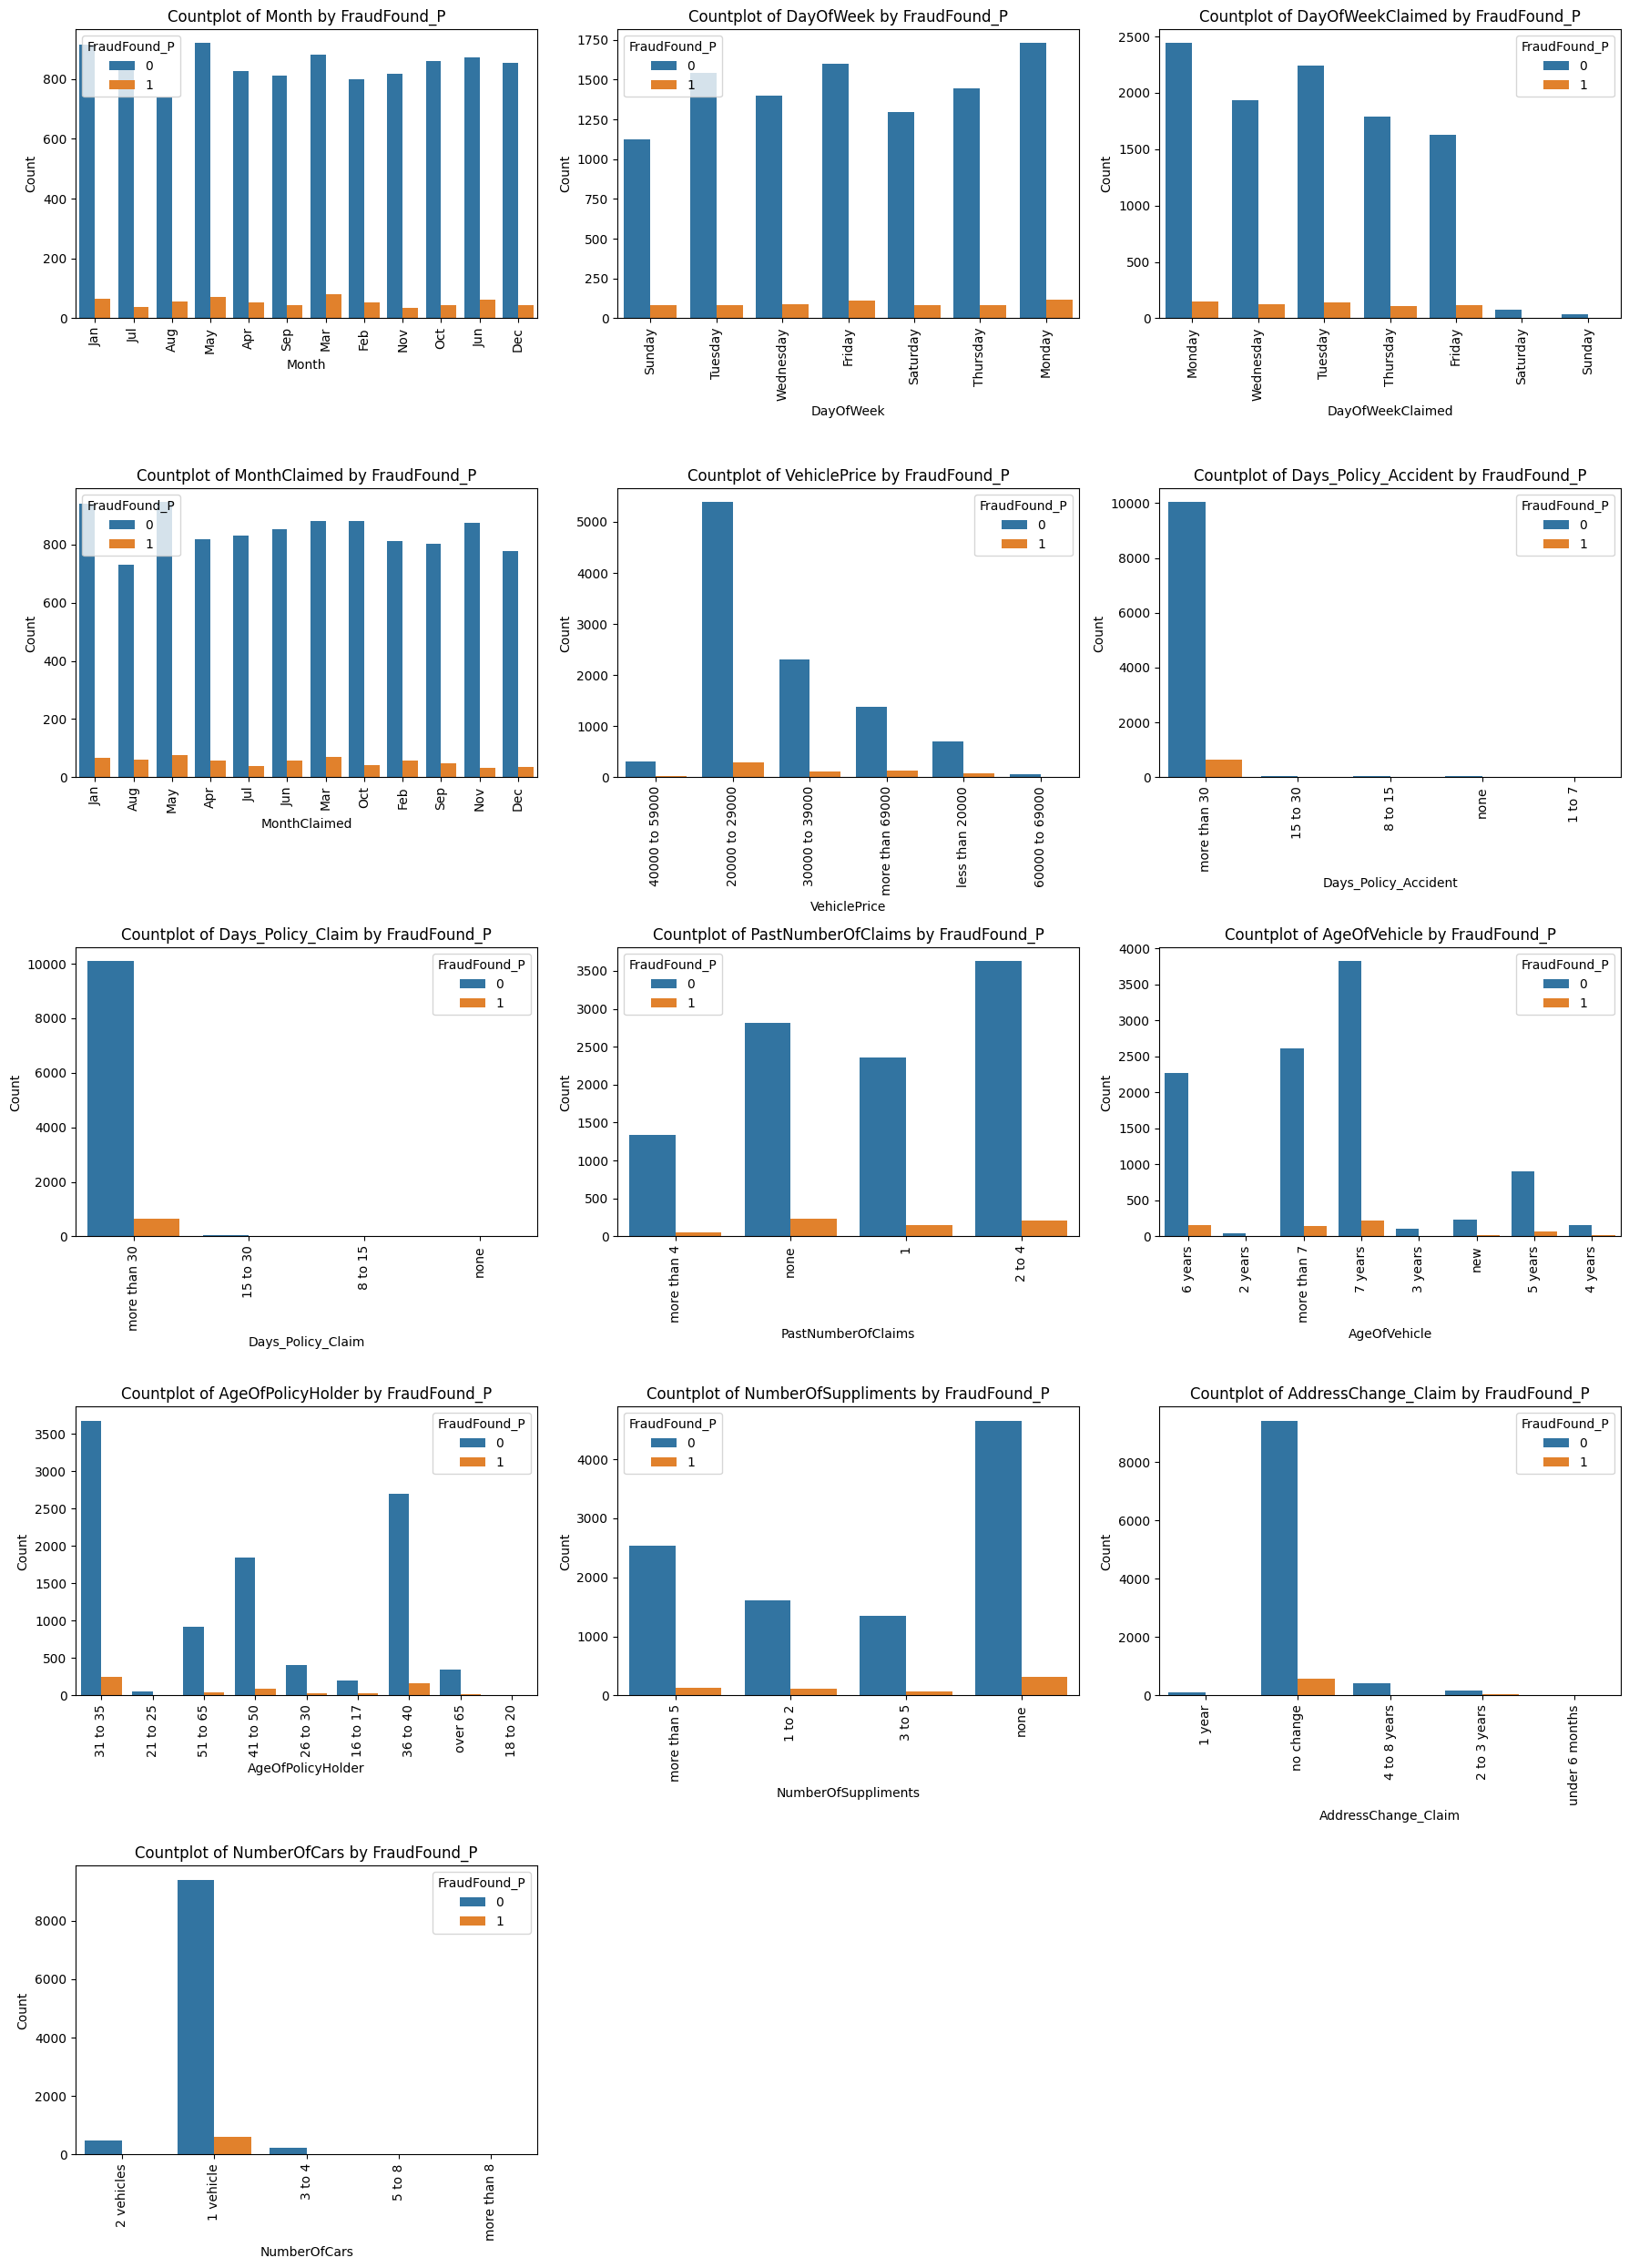

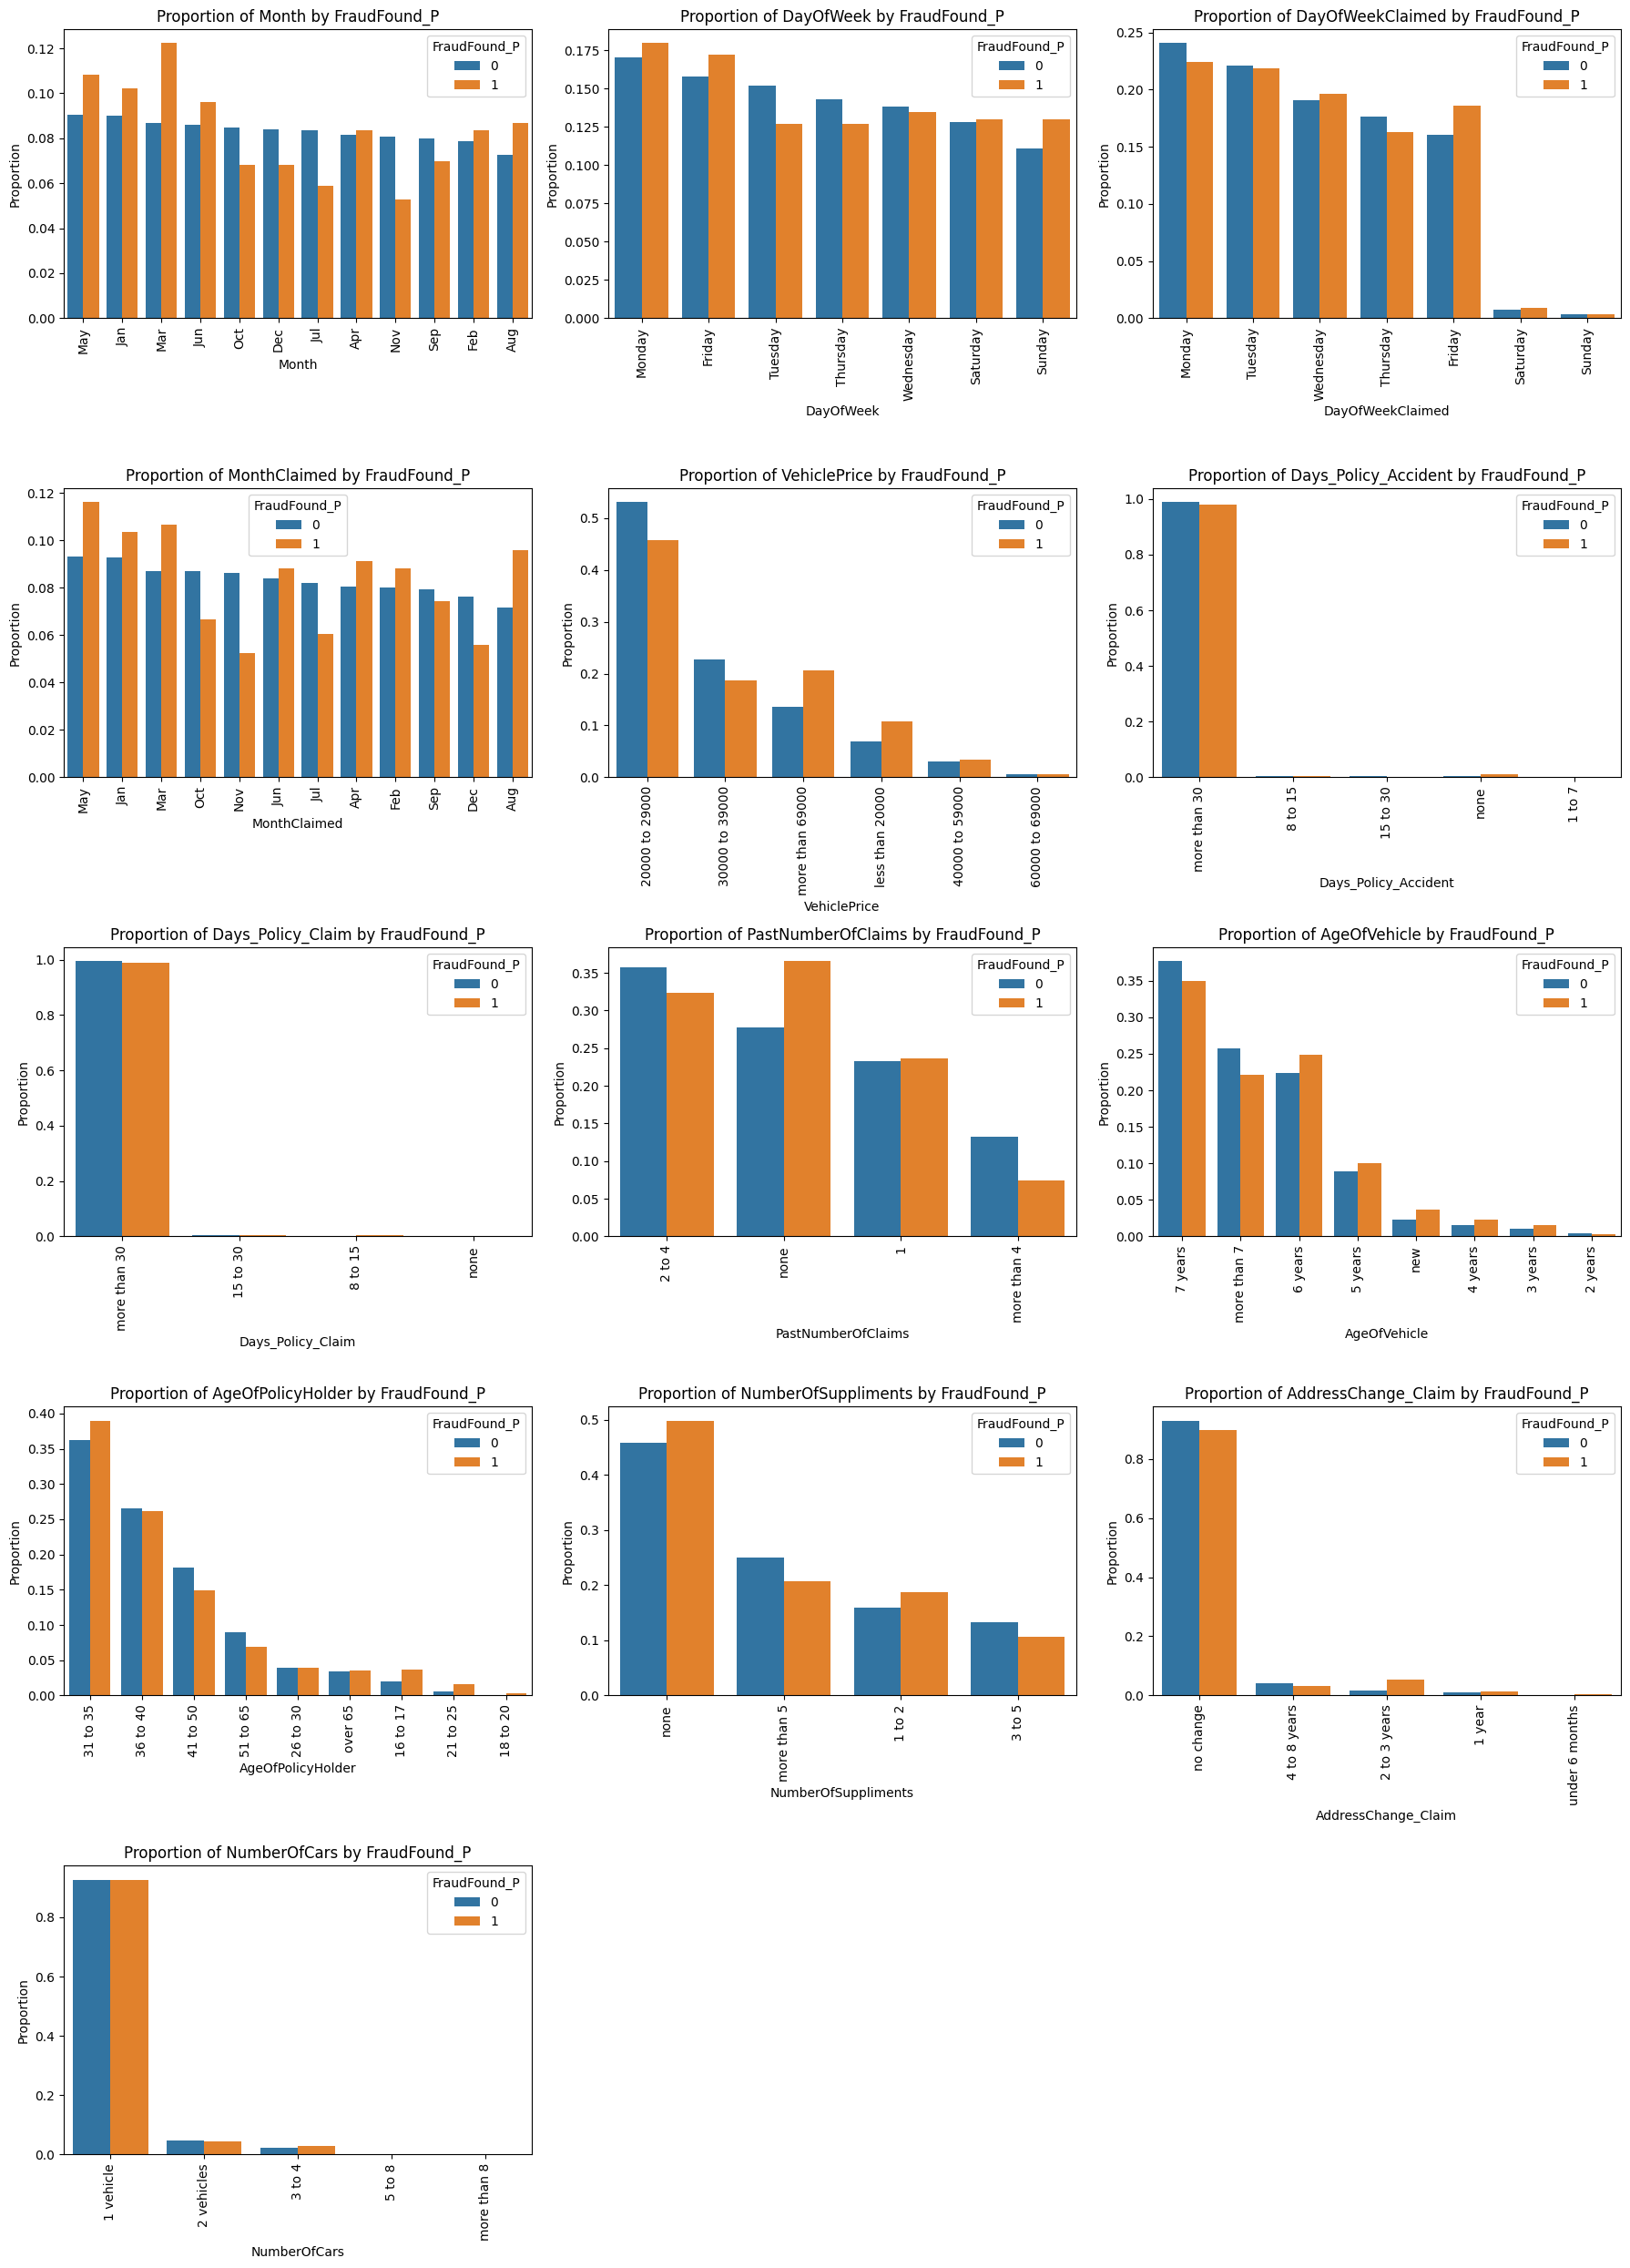

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
# Plot countplots for ordinal columns by FraudFound_P
# Create a single dataframe for plotting by combining Xtrain and ytrain
df_plot = pd.concat([Xtrain, ytrainT], axis=1)

# Filter the DataFrame for rows where FraudFound_P is 0 or 1
df_plot_filtered = df_plot[df_plot['FraudFound_P'].isin([0, 1])]

# Ensure ord_col only contains columns present in Xtrain
ord_col_valid = [col for col in ord_col if col in Xtrain.columns]

# Determine the number of rows and columns for subplots
n_cols = 3 # You can adjust the number of columns as needed
n_rows = (len(ord_col_valid) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.ravel() # Flatten the axes array for easy iteration
plt.xticks(rotation=90)
# Iterate through the valid ordinal columns and plot countplots
for i, col in enumerate(ord_col_valid):
    sns.countplot(data=df_plot_filtered, x=col, hue='FraudFound_P', ax=axes[i])
    axes[i].set_title(f'Countplot of {col} by FraudFound_P')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='FraudFound_P')
    axes[i].tick_params(axis='x', rotation=90)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.xticks(rotation=90)
plt.show()

# Modify the countplot to show proportions instead of raw counts

# Create a single dataframe for plotting by combining Xtrain and ytrain
df_plot = pd.concat([Xtrain, ytrainT], axis=1)

# Filter the DataFrame for rows where FraudFound_P is 0 or 1
df_plot_filtered = df_plot[df_plot['FraudFound_P'].isin([0, 1])]

# Ensure ord_col only contains columns present in Xtrain
ord_col_valid = [col for col in ord_col if col in Xtrain.columns]

# Determine the number of rows and columns for subplots
n_cols = 3 # You can adjust the number of columns as needed
n_rows = (len(ord_col_valid) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.ravel() # Flatten the axes array for easy iteration
plt.xticks(rotation=90)
# Iterate through the valid ordinal columns and plot countplots with proportions
for i, col in enumerate(ord_col_valid):
    # Calculate the proportion for each category within each FraudFound_P group
    proportions = df_plot_filtered.groupby('FraudFound_P')[col].value_counts(normalize=True).rename('proportion').reset_index()

    # Plot the proportions using a bar plot
    sns.barplot(data=proportions, x=col, y='proportion', hue='FraudFound_P', ax=axes[i])

    axes[i].set_title(f'Proportion of {col} by FraudFound_P')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='FraudFound_P')
    axes[i].tick_params(axis='x', rotation=90)
    plt.xticks(rotation=90)
# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


In [ ]:
cats_01 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cats_02 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cats_03 = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
cats_04 = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
cats_05 = ['less than 20000', '20000 to 29000', '30000 to 39000', '40000 to 59000', '60000 to 69000', 'more than 69000']
cats_06 = ['none', '1 to 7', '8 to 15', '15 to 30', 'more than 30']
cats_07 = ['none', '1 to 7', '8 to 15', '15 to 30', 'more than 30']
cats_08 = ['none', '1', '2 to 4', 'more than 4']
cats_09 = ['new', '2 years', '3 years', '4 years', '5 years', '6 years', '7 years', 'more than 7']
cats_10 = ['16 to 17', '18 to 20', '21 to 25', '26 to 30', '31 to 35', '36 to 40', '41 to 50', '51 to 65', 'over 65']
cats_11 = ['none', '1 to 2', '3 to 5', 'more than 5']
cats_12 = ['no change', 'under 6 months', '1 year', '2 to 3 years', '4 to 8 years']
cats_13 = ['1 vehicle', '2 vehicles', '3 to 4', '5 to 8', 'more than 8']


categories = [cats_01, cats_02, cats_03, cats_04, cats_05, cats_06, cats_07, cats_08, cats_09, cats_10, cats_11, cats_12, cats_13]

oe = OrdinalEncoder(categories=categories, dtype=int)

#se definen la variables de entrada ordinales
ord_col = ['Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed','VehiclePrice',
           'Days_Policy_Accident','Days_Policy_Claim','PastNumberOfClaims','AgeOfVehicle',
           'AgeOfPolicyHolder','NumberOfSuppliments','AddressChange_Claim','NumberOfCars']

# Se definen los dataframes transformados con OrdinalEncoder
XtrainT_OE = pd.DataFrame()
XvalT_OE = pd.DataFrame()
XtestT_OE = pd.DataFrame()

# Se les asigna el valor sin transfrormar para que no estén vacios y no arroje error el oe.transform
XtrainT_OE[ord_col] = Xtrain[ord_col]
XvalT_OE[ord_col] = Xval[ord_col]
XtestT_OE[ord_col] = Xtest[ord_col]

# Se aplica la transformación OrdinalEncoder
oe.fit(Xtrain[ord_col])
OrdinalEncoder()
XtrainT_OE[ord_col] = oe.transform(Xtrain[ord_col])
XvalT_OE[ord_col] = oe.transform(Xval[ord_col])
XtestT_OE[ord_col] = oe.transform(Xtest[ord_col])



In [ ]:
display(Xtrain[ord_col].head(), Xval[ord_col].head(), Xtest[ord_col].head(), XtrainT_OE.head(), XvalT_OE.head(), XtestT_OE.head())

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars
12012,Jan,Sunday,Monday,Jan,40000 to 59000,more than 30,more than 30,more than 4,6 years,31 to 35,more than 5,1 year,2 vehicles
1149,Jul,Tuesday,Wednesday,Aug,20000 to 29000,more than 30,more than 30,none,2 years,21 to 25,1 to 2,no change,1 vehicle
11427,Aug,Wednesday,Monday,Aug,20000 to 29000,more than 30,more than 30,1,more than 7,51 to 65,3 to 5,no change,1 vehicle
3476,May,Sunday,Tuesday,May,30000 to 39000,more than 30,more than 30,none,more than 7,41 to 50,none,no change,1 vehicle
6678,Aug,Wednesday,Wednesday,Aug,20000 to 29000,more than 30,more than 30,2 to 4,6 years,41 to 50,1 to 2,4 to 8 years,2 vehicles


,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars
9475,May,Sunday,Wednesday,May,20000 to 29000,more than 30,more than 30,none,5 years,41 to 50,1 to 2,no change,1 vehicle
3691,Feb,Monday,Wednesday,Feb,30000 to 39000,more than 30,more than 30,1,7 years,31 to 35,none,no change,1 vehicle
4061,Jun,Wednesday,Monday,Jun,20000 to 29000,more than 30,more than 30,none,more than 7,36 to 40,3 to 5,no change,1 vehicle
3096,Feb,Friday,Thursday,Feb,more than 69000,more than 30,more than 30,2 to 4,new,16 to 17,none,no change,1 vehicle
7021,Dec,Sunday,Wednesday,Feb,20000 to 29000,more than 30,more than 30,2 to 4,more than 7,51 to 65,none,no change,1 vehicle


,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars
9698,Jul,Thursday,Monday,Jul,20000 to 29000,more than 30,more than 30,2 to 4,more than 7,41 to 50,more than 5,no change,1 vehicle
10643,Mar,Wednesday,Wednesday,Mar,20000 to 29000,more than 30,more than 30,2 to 4,2 years,31 to 35,more than 5,no change,1 vehicle
13129,Jun,Friday,Tuesday,Jul,more than 69000,more than 30,more than 30,1,more than 7,36 to 40,1 to 2,no change,1 vehicle
3127,May,Friday,Monday,May,more than 69000,more than 30,more than 30,none,7 years,36 to 40,none,no change,1 vehicle
11710,Nov,Wednesday,Friday,Nov,20000 to 29000,more than 30,more than 30,none,more than 7,36 to 40,none,no change,1 vehicle


,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars
12012,0,6,0,0,3,4,4,3,5,4,3,2,1
1149,6,1,2,7,1,4,4,0,1,2,1,0,0
11427,7,2,0,7,1,4,4,1,7,7,2,0,0
3476,4,6,1,4,2,4,4,0,7,6,0,0,0
6678,7,2,2,7,1,4,4,2,5,6,1,4,1


,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars
9475,4,6,2,4,1,4,4,0,4,6,1,0,0
3691,1,0,2,1,2,4,4,1,6,4,0,0,0
4061,5,2,0,5,1,4,4,0,7,5,2,0,0
3096,1,4,3,1,5,4,4,2,0,0,0,0,0
7021,11,6,2,1,1,4,4,2,7,7,0,0,0


,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars
9698,6,3,0,6,1,4,4,2,7,6,3,0,0
10643,2,2,2,2,1,4,4,2,1,4,3,0,0
13129,5,4,1,6,5,4,4,1,7,5,1,0,0
3127,4,4,0,4,5,4,4,0,6,5,0,0,0
11710,10,2,4,10,1,4,4,0,7,5,0,0,0


In [ ]:
# Este código transforma los datos con Quantile Transformer
qt = QuantileTransformer(n_quantiles=10, output_distribution="normal", random_state=1).set_output(transform="pandas")
qt.fit(XtrainT_OE[ord_col])

XtrainT[ord_col] = qt.transform(XtrainT_OE[ord_col])
XvalT[ord_col] = qt.transform(XvalT_OE[ord_col])
XtestT[ord_col] = qt.transform(XtestT_OE[ord_col])

In [ ]:
# Este código transforma los datos con MinMaxScaler
scaler = MinMaxScaler().set_output(transform="pandas")
scaler.fit(XtrainT[ord_col])

XtrainT[ord_col] = scaler.transform(XtrainT[ord_col])
XvalT[ord_col] = scaler.transform(XvalT[ord_col])
XtestT[ord_col] = scaler.transform(XtestT[ord_col])

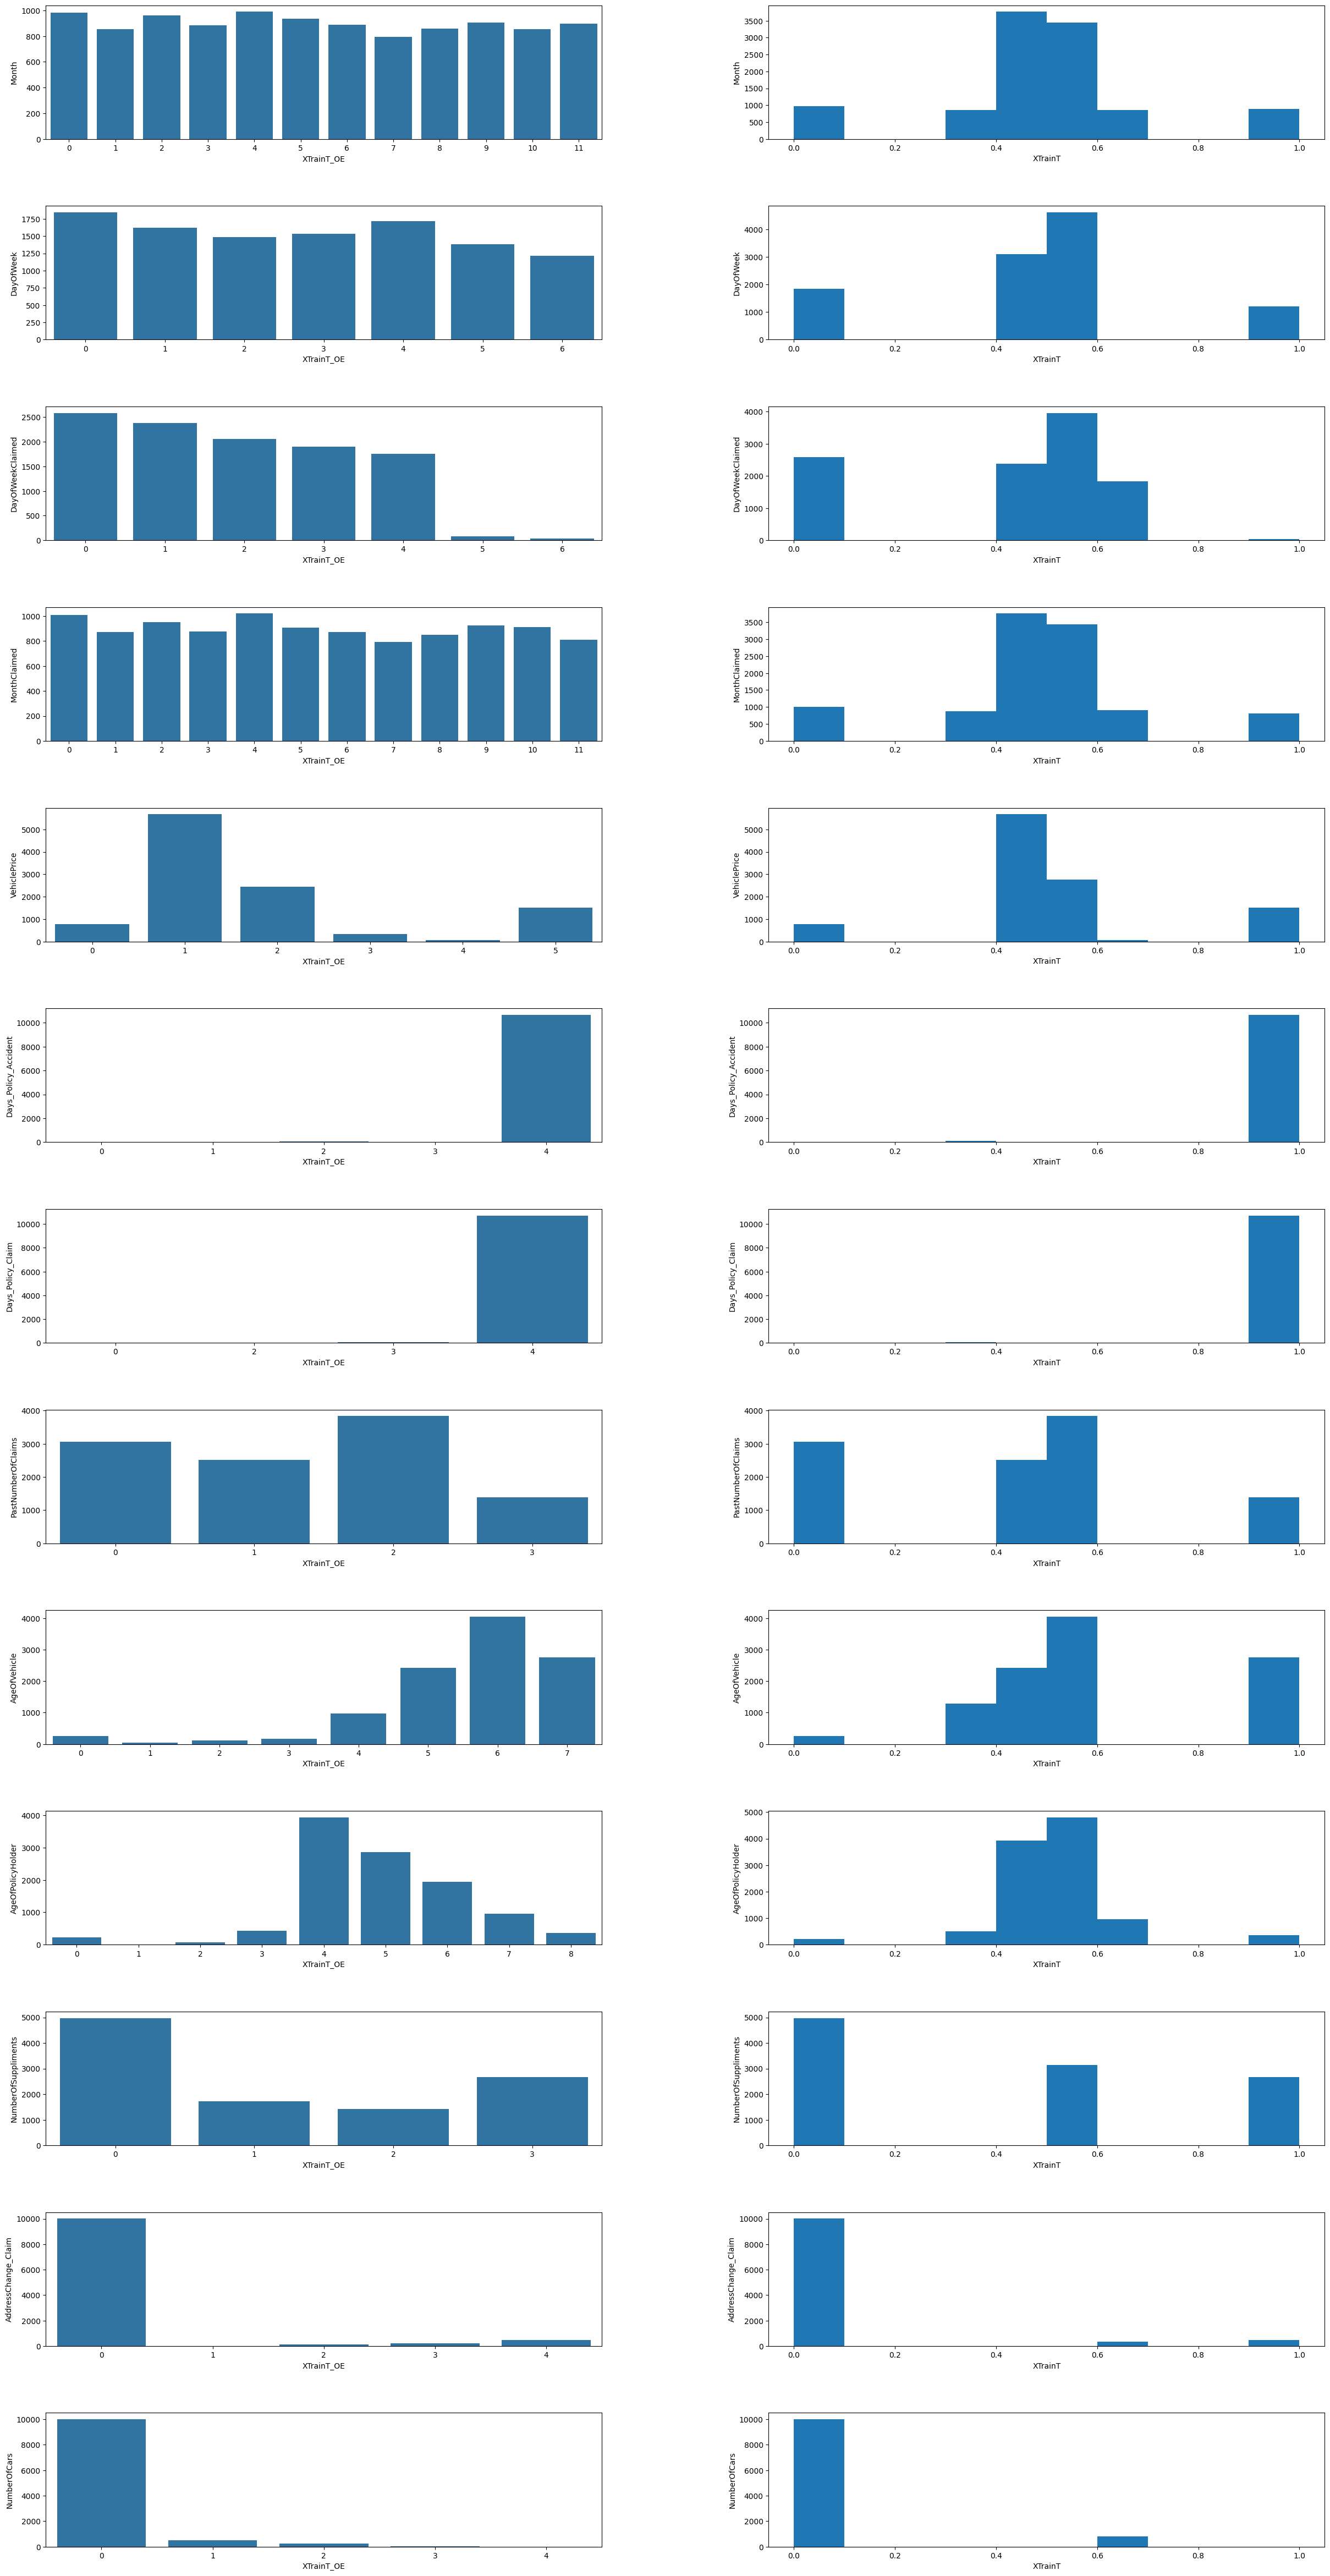

In [ ]:
#Se comparan los datos del ordinal encoder original vs. los transformados con MinMaxScaler

fig, axes = plt.subplots(13,2, figsize=(30,60)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()

i = 0
for col, ax in zip(XtrainT_OE[ord_col], axes):

  i = i + 1
  plt.subplot(13,2,i)
  sns.countplot(x=XtrainT_OE[col])
  plt.ylabel(f'{col}')
  plt.xlabel("XTrainT_OE")

  i = i + 1
  plt.subplot(13,2,i)
  plt.hist(XtrainT[col], bins=10)
  plt.ylabel(f'{col}')
  plt.xlabel("XTrainT")
fig.subplots_adjust(hspace=.5)




In [ ]:
# Se eliminan los dataframe auxiliares

del XtrainT_OE
del XvalT_OE
del XtestT_OE


**7) Se obtiene la matriz de correlación de los factores obtenidos hasta el momento, incluyendo la variable “FraudFound_P”.**

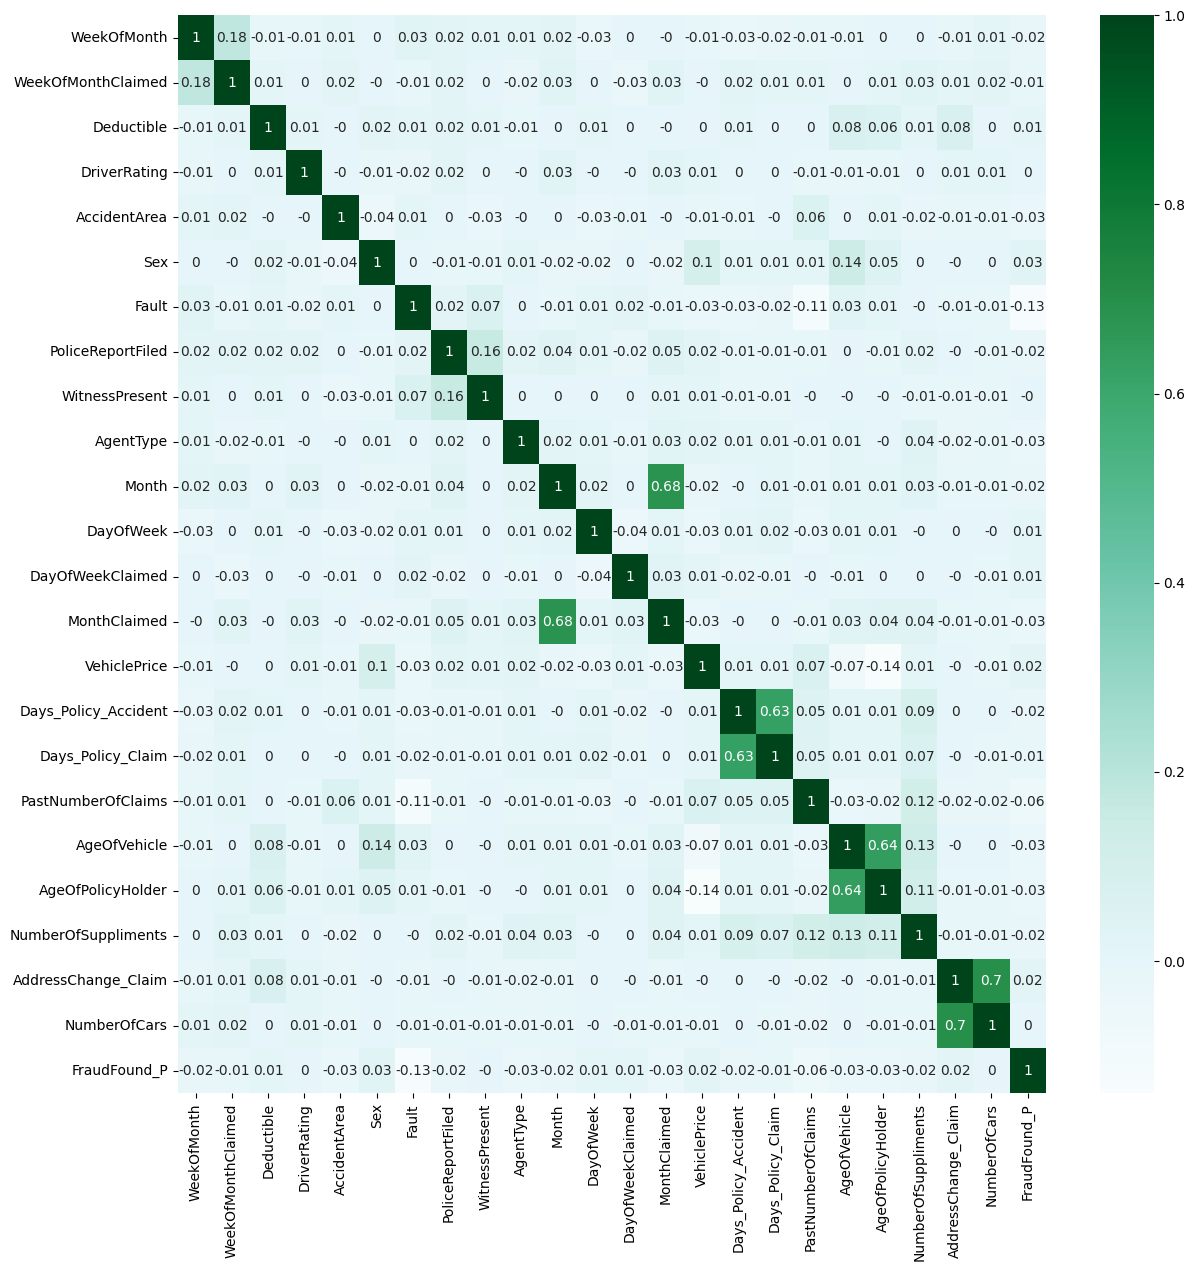

In [ ]:
combined_df = pd.concat([XtrainT, ytrainT], axis=1)

fig, ax = plt.subplots(figsize=(14,14))
ax = sns.heatmap(round(combined_df.corr(method='pearson', numeric_only=True),2), annot=True, cmap="BuGn")
im = ax.collections[0]

**a) Correlaciones positivas “fuertes” entre pares de factores dentro de la matriz.**

Tomando en cuenta que  una correlación se considera "fuerte" cuando su coeficiente de Pearson es mayor o igual a 0.6 en estudios de personas.

Los pares de factores con una correlación positiva fuerte son:

- MonthClaimed y Month
- Days_Policy_Accident y Days_Policy_Claim
- AgeOfVehicle y AgeOfPolicyHolder
- NumberOfCars y AddressChange_Claim

Cabe mencionar que no se observa ninguna correlación fuerte de alguna variable con 'FraudFound_P'. Seguramente esto se debe al desbalanceo de esta clase. Probalemente sea conveniente obtener nuevamente la matriz de correlación una vez que se hayan adoptado técnicnas para el balanceo de clases

**b) Correlaciones negativas “fuertes” entre pares de factores dentro de la matriz.**

No existen correlaciones negativas fuertes (con coeficiente de Pearson menor a -0.60) en la matriz de correlación obtenida

**8) Se aplica la transformación get_dummies() de Pandas a las variables nominales. Se utiliza el argumento “drop_first=True” para evitar multicolinealidad entre variables**

In [ ]:
#se obtiene el listado de variables categóricas

cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()
cat_cols

['Month',
 'DayOfWeek',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [ ]:
# se remueven del listado las variables ordinales y binarias que ya se preprocesaron

nomi_cols = list(set(cat_cols) - set(bin_cols) - set(ord_col))

nomi_cols.sort()

nomi_cols

['BasePolicy', 'MaritalStatus', 'VehicleCategory']

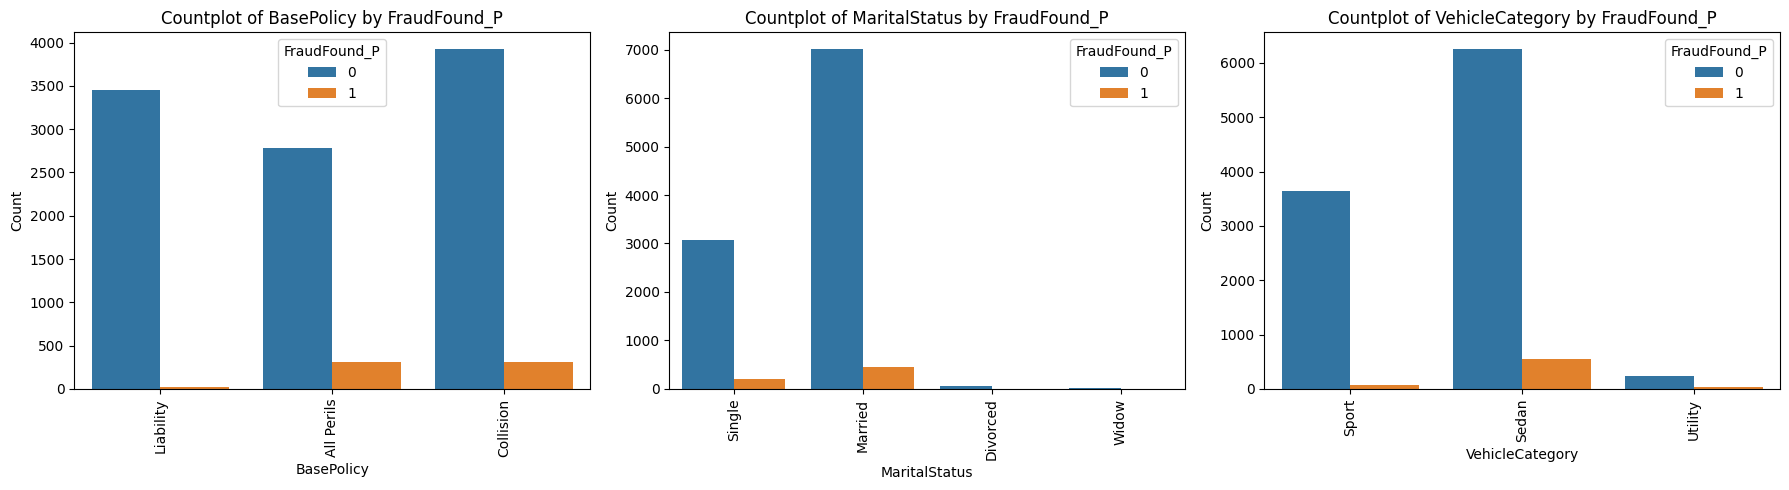

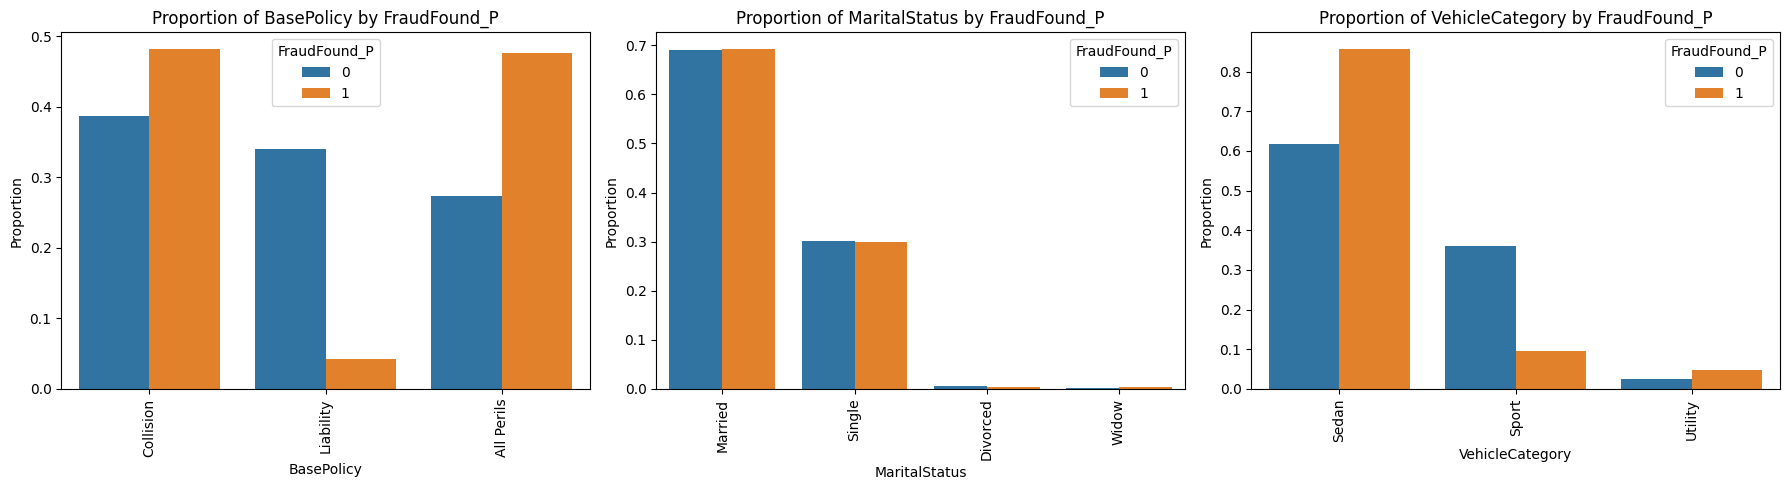

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Ensure nomi_cols only contains columns present in Xtrain
nomi_cols_valid = [col for col in nomi_cols if col in Xtrain.columns]

# Create a single dataframe for plotting by combining Xtrain and ytrainT
df_plot = pd.concat([Xtrain, ytrainT], axis=1)

# Filter the DataFrame for rows where FraudFound_P is 0 or 1
df_plot_filtered = df_plot[df_plot['FraudFound_P'].isin([0, 1])]


# Determine the number of rows and columns for subplots
n_cols = 3 # You can adjust the number of columns as needed
n_rows = (len(nomi_cols_valid) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.ravel() # Flatten the axes array for easy iteration

# Iterate through the valid nominal columns and plot countplots
for i, col in enumerate(nomi_cols_valid):
    sns.countplot(data=df_plot_filtered, x=col, hue='FraudFound_P', ax=axes[i])
    axes[i].set_title(f'Countplot of {col} by FraudFound_P')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='FraudFound_P')
    axes[i].tick_params(axis='x', rotation=90)


# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Modify the countplot to show proportions instead of raw counts

# Create a single dataframe for plotting by combining Xtrain and ytrainT
df_plot = pd.concat([Xtrain, ytrainT], axis=1)

# Filter the DataFrame for rows where FraudFound_P is 0 or 1
df_plot_filtered = df_plot[df_plot['FraudFound_P'].isin([0, 1])]

# Ensure nomi_cols only contains columns present in Xtrain
nomi_cols_valid = [col for col in nomi_cols if col in Xtrain.columns]

# Determine the number of rows and columns for subplots
n_cols = 3 # You can adjust the number of columns as needed
n_rows = (len(nomi_cols_valid) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 6, n_rows * 5))
axes = axes.ravel() # Flatten the axes array for easy iteration

# Iterate through the valid nominal columns and plot countplots with proportions
for i, col in enumerate(nomi_cols_valid):
    # Calculate the proportion for each category within each FraudFound_P group
    proportions = df_plot_filtered.groupby('FraudFound_P')[col].value_counts(normalize=True).rename('proportion').reset_index()

    # Plot the proportions using a bar plot
    sns.barplot(data=proportions, x=col, y='proportion', hue='FraudFound_P', ax=axes[i])

    axes[i].set_title(f'Proportion of {col} by FraudFound_P')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Proportion')
    axes[i].legend(title='FraudFound_P')
    axes[i].tick_params(axis='x', rotation=90)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [ ]:
# Se crea un dataframe con las variables nominales

df_nomi = df[nomi_cols]

df_nomi

,BasePolicy,MaritalStatus,VehicleCategory
0,Liability,Single,Sport
1,Collision,Single,Sport
2,Collision,Married,Sport
3,Liability,Married,Sport
4,Collision,Single,Sport
...,...,...,...
15415,Collision,Married,Sedan
15416,Liability,Married,Sport
15417,Collision,Single,Sedan
15418,All Perils,Married,Sedan


In [ ]:
# Se aplica la transformación get_dummies()

df_nomi_dummies = pd.get_dummies(df_nomi, drop_first=True, dtype='int')

df_nomi_dummies

,BasePolicy_Collision,BasePolicy_Liability,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,VehicleCategory_Sport,VehicleCategory_Utility
0,0,1,0,1,0,1,0
1,1,0,0,1,0,1,0
2,1,0,1,0,0,1,0
3,0,1,1,0,0,1,0
4,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...
15415,1,0,1,0,0,0,0
15416,0,1,1,0,0,1,0
15417,1,0,0,1,0,0,0
15418,0,0,1,0,0,0,0


In [ ]:
# Se incorpora la variable 'FraudFound_P' al dataframe para que posteriormente se separe en los conjuntos de
# Entrenamiento, Validación y Prueba conservando la estratificación de esta variable

df_nomi_dummies['FraudFound_P'] = df['FraudFound_P']

df_nomi_dummies

,BasePolicy_Collision,BasePolicy_Liability,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,VehicleCategory_Sport,VehicleCategory_Utility,FraudFound_P
0,0,1,0,1,0,1,0,0
1,1,0,0,1,0,1,0,0
2,1,0,1,0,0,1,0,0
3,0,1,1,0,0,1,0,0
4,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
15415,1,0,1,0,0,0,0,1
15416,0,1,1,0,0,1,0,0
15417,1,0,0,1,0,0,0,1
15418,0,0,1,0,0,0,0,0


In [ ]:
# Se divide el dataframe en los conjuntos Auxiliar y Prueba
strat_aux_set, strat_test_set = train_test_split(
df_nomi_dummies, test_size=0.15, stratify=df_nomi_dummies["FraudFound_P"], random_state=1)

# Se divide el conjunto Auxiliar en los conjuntos Entrenamiento y Validación
strat_train_set, strat_val_set = train_test_split(
strat_aux_set, test_size=0.17647, stratify=strat_aux_set["FraudFound_P"], random_state=1)



In [ ]:
# Se despliegan los conjuntos obtenidos
display(strat_train_set,strat_val_set,strat_test_set)

,BasePolicy_Collision,BasePolicy_Liability,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,VehicleCategory_Sport,VehicleCategory_Utility,FraudFound_P
12012,0,1,0,1,0,1,0,0
1149,0,0,0,1,0,0,0,0
11427,0,0,1,0,0,0,0,0
3476,1,0,1,0,0,0,0,0
6678,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
8581,0,1,1,0,0,1,0,0
2782,0,1,1,0,0,1,0,0
14774,0,1,1,0,0,1,0,0
9828,0,1,1,0,0,1,0,0


,BasePolicy_Collision,BasePolicy_Liability,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,VehicleCategory_Sport,VehicleCategory_Utility,FraudFound_P
9475,1,0,1,0,0,0,0,0
3691,1,0,0,1,0,0,0,0
4061,0,0,1,0,0,0,0,0
3096,0,1,0,1,0,1,0,0
7021,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
9892,0,1,0,1,0,1,0,0
4072,0,0,0,1,0,0,0,0
4342,1,0,0,1,0,0,0,0
4484,1,0,0,1,0,0,0,0


,BasePolicy_Collision,BasePolicy_Liability,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,VehicleCategory_Sport,VehicleCategory_Utility,FraudFound_P
9698,1,0,1,0,0,0,0,0
10643,1,0,1,0,0,0,0,0
13129,0,0,1,0,0,0,1,1
3127,1,0,1,0,0,0,0,0
11710,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
4138,1,0,0,1,0,0,0,0
1240,0,1,0,1,0,1,0,0
13396,0,0,1,0,0,0,0,0
6082,0,1,0,1,0,1,0,0


In [ ]:
# Se verifica que los conjuntos se hayan dividido en 70%, 15% y 15% conservando la proporción de datos (frecuencia) en la variabe 'FraudFound_P'
display(strat_train_set['FraudFound_P'].astype(object).describe(include = 'object'),strat_val_set['FraudFound_P'].astype(object).describe(include = 'object'),strat_test_set['FraudFound_P'].astype(object).describe(include = 'object'))

,FraudFound_P
count,10794
unique,2
top,0
freq,10148


,FraudFound_P
count,2313
unique,2
top,0
freq,2174


,FraudFound_P
count,2313
unique,2
top,0
freq,2175


In [ ]:
# Se obtiene el listado de columnas excluyendo a la variable 'FraudFound_P'

dummy_cols_T = strat_train_set.columns.tolist()

dummy_cols_T = list(set(dummy_cols_T) - set(['FraudFound_P']))

dummy_cols_T.sort()

dummy_cols_T

['BasePolicy_Collision',
 'BasePolicy_Liability',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'MaritalStatus_Widow',
 'VehicleCategory_Sport',
 'VehicleCategory_Utility']

In [ ]:
# Se incorporan las variables transformadas a sus respectivos conjuntos de entrenamiento, validación y prueba

for col in dummy_cols_T:
  XtrainT[col] = strat_train_set[col]
  XvalT[col] = strat_val_set[col]
  XtestT[col] = strat_test_set[col]


In [ ]:
# Se eliminan los dataframes auxiliares

del strat_train_set
del strat_val_set
del strat_test_set
del strat_aux_set
del df_nomi_dummies
del df_nomi

**9) Se usa la instrucción XtrainT.head().T, para desplegar los primeros registros de los datos de entrenamiento con todas las transformaciones realizadas hasta ahora.
NOTA: Hasta aquí los nombres de las variables siguen siendo los mismos: XtrainT,XvalT, XtestT, ytrainT, yvalT, ytestT.**

In [ ]:
XtrainT.head()

,WeekOfMonth,WeekOfMonthClaimed,Deductible,DriverRating,AccidentArea,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy_Collision,BasePolicy_Liability,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,VehicleCategory_Sport,VehicleCategory_Utility
12012,0.443314,0.472860,0.5,0.52714,1,1,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0.586144,1.0,1.0,1.000000,0.443314,0.426461,1.000000,0.653214,0.632997,0,1,0,1,0,1,0
1149,0.513435,0.527140,0.5,0.52714,1,1,0,0,0,0,0.513435,0.426461,0.513435,0.541421,0.458579,1.0,1.0,0.000000,0.315889,0.346786,0.513435,0.000000,0.000000,0,0,0,1,0,0,0
11427,0.513435,0.593033,0.5,0.47286,1,1,0,0,0,0,0.541421,0.472860,0.000000,0.541421,0.458579,1.0,1.0,0.472860,1.000000,0.617384,0.541421,0.000000,0.000000,0,0,1,0,0,0,0
3476,0.443314,0.527140,0.5,0.47286,1,1,1,0,0,0,0.472860,1.000000,0.472860,0.472860,0.556686,1.0,1.0,0.000000,1.000000,0.573539,0.000000,0.000000,0.000000,1,0,1,0,0,0,0
6678,0.513435,0.527140,0.5,0.52714,1,1,0,0,0,0,0.541421,0.472860,0.513435,0.541421,0.458579,1.0,1.0,0.541421,0.443314,0.573539,0.513435,1.000000,0.632997,1,0,1,0,0,0,0


**a) Despliega las dimensiones de los conjuntos XtrainT, XvalT y XtestT.**

In [ ]:
print("La dimensión de Xtrain es " + str(XtrainT.shape))
print("La dimensión de Xval es " + str(XvalT.shape))
print("La dimensión de Xtest es " + str(XtestT.shape))

La dimensión de Xtrain es (10794, 30)
La dimensión de Xval es (2313, 30)
La dimensión de Xtest es (2313, 30)


#**PARTE 2: Análisis exploratorio entre factores**
<br>


**10) Se pueden analizar una buena cantidad de factores para buscar relaciones entre los
factores y la variable de salida “FraudFound_P”. A a manera de
ejemplos, veamos solo algunas de dichas relaciones gráficamente y que pueden aportar
información al problema que enfrentamos.**

In [ ]:
# Se crea un dataframe con el conjunto de entrenamiento que incluya la variable 'FraudFound_P' para comparar los gráficos
# de este conjunto con los gráficos del conjunto original y corroborar que se mantenga la misma proporción (en las variables que sea posible la comparación)

df_train_T = XtrainT.copy()
df_train_T['FraudFound_P'] = ytrainT['FraudFound_P']
df_train_T

,WeekOfMonth,WeekOfMonthClaimed,Deductible,DriverRating,AccidentArea,Sex,Fault,PoliceReportFiled,WitnessPresent,AgentType,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,PastNumberOfClaims,AgeOfVehicle,AgeOfPolicyHolder,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,BasePolicy_Collision,BasePolicy_Liability,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,VehicleCategory_Sport,VehicleCategory_Utility,FraudFound_P
12012,0.443314,0.472860,0.5,0.52714,1,1,0,0,0,0,0.000000,1.000000,0.000000,0.000000,0.586144,1.0,1.0,1.000000,0.443314,0.426461,1.000000,0.653214,0.632997,0,1,0,1,0,1,0,0
1149,0.513435,0.527140,0.5,0.52714,1,1,0,0,0,0,0.513435,0.426461,0.513435,0.541421,0.458579,1.0,1.0,0.000000,0.315889,0.346786,0.513435,0.000000,0.000000,0,0,0,1,0,0,0,0
11427,0.513435,0.593033,0.5,0.47286,1,1,0,0,0,0,0.541421,0.472860,0.000000,0.541421,0.458579,1.0,1.0,0.472860,1.000000,0.617384,0.541421,0.000000,0.000000,0,0,1,0,0,0,0,0
3476,0.443314,0.527140,0.5,0.47286,1,1,1,0,0,0,0.472860,1.000000,0.472860,0.472860,0.556686,1.0,1.0,0.000000,1.000000,0.573539,0.000000,0.000000,0.000000,1,0,1,0,0,0,0,0
6678,0.513435,0.527140,0.5,0.52714,1,1,0,0,0,0,0.541421,0.472860,0.513435,0.541421,0.458579,1.0,1.0,0.541421,0.443314,0.573539,0.513435,1.000000,0.632997,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8581,0.000000,0.472860,0.5,0.52714,1,1,1,0,0,0,0.513435,0.541421,0.617384,0.513435,0.556686,1.0,1.0,0.541421,0.513435,0.426461,0.000000,0.000000,0.000000,0,1,1,0,0,1,0,0
2782,0.593033,1.000000,0.5,0.52714,1,1,1,0,0,0,0.617384,0.541421,0.472860,0.617384,0.458579,1.0,1.0,0.541421,0.443314,0.426461,0.000000,0.000000,0.000000,0,1,1,0,0,1,0,0
14774,0.513435,0.527140,0.5,0.00000,1,1,0,0,0,0,0.556686,0.000000,0.472860,0.556686,0.458579,1.0,1.0,1.000000,0.513435,0.513435,1.000000,0.000000,0.000000,0,1,1,0,0,1,0,0
9828,0.443314,0.593033,0.5,0.47286,1,1,0,0,0,0,0.617384,0.472860,0.472860,0.617384,0.458579,1.0,1.0,0.541421,0.443314,0.426461,0.541421,0.653214,0.632997,0,1,1,0,0,1,0,0


**a) Las variables “AccidentArea” y "FraudFound_P".**

<Axes: xlabel='AccidentArea', ylabel='count'>

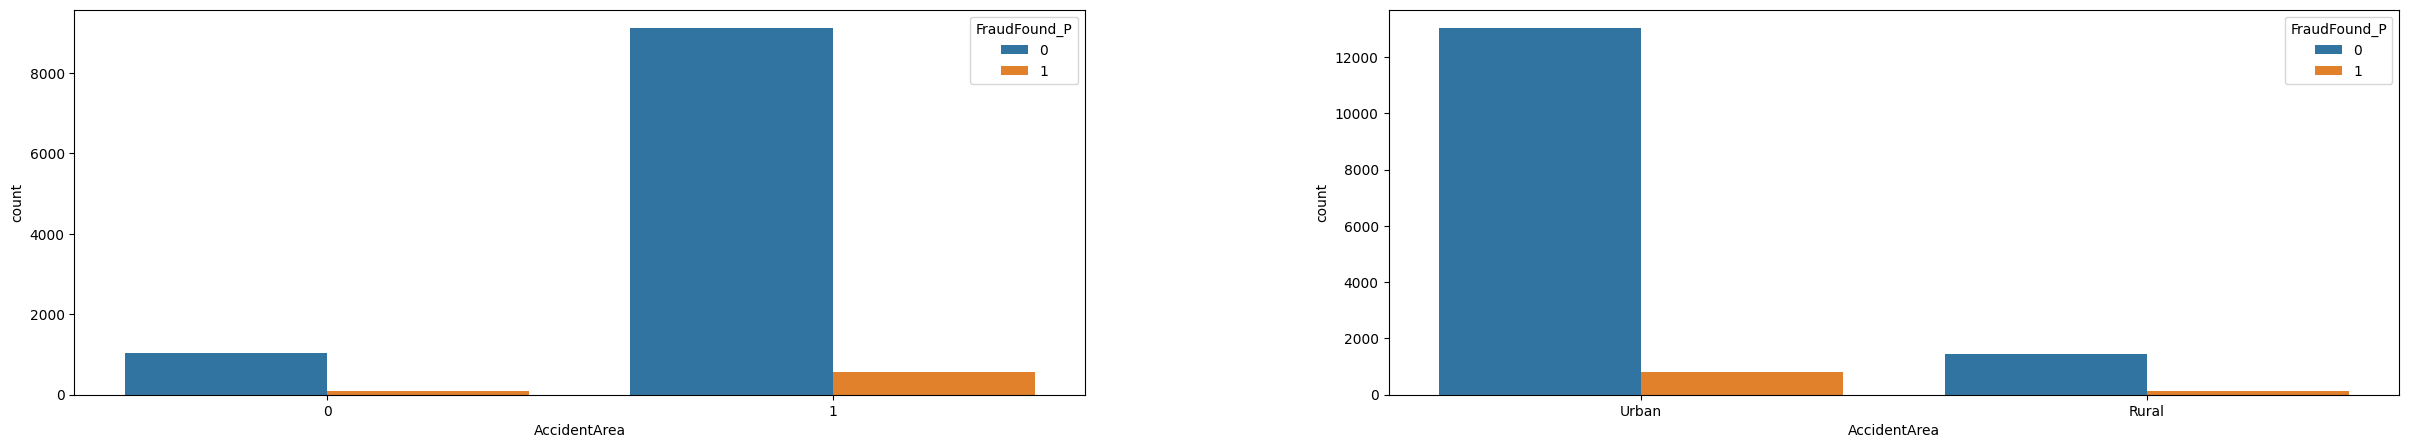

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(30,5)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()

plt.subplot(1,2,1)
sns.countplot(df_train_T, x="AccidentArea", hue="FraudFound_P")

plt.subplot(1,2,2)
sns.countplot(df, x="AccidentArea", hue="FraudFound_P")

**b) Las variables “VehiclePrice” y “FraudFound_P”.**

<Axes: xlabel='VehiclePrice', ylabel='count'>

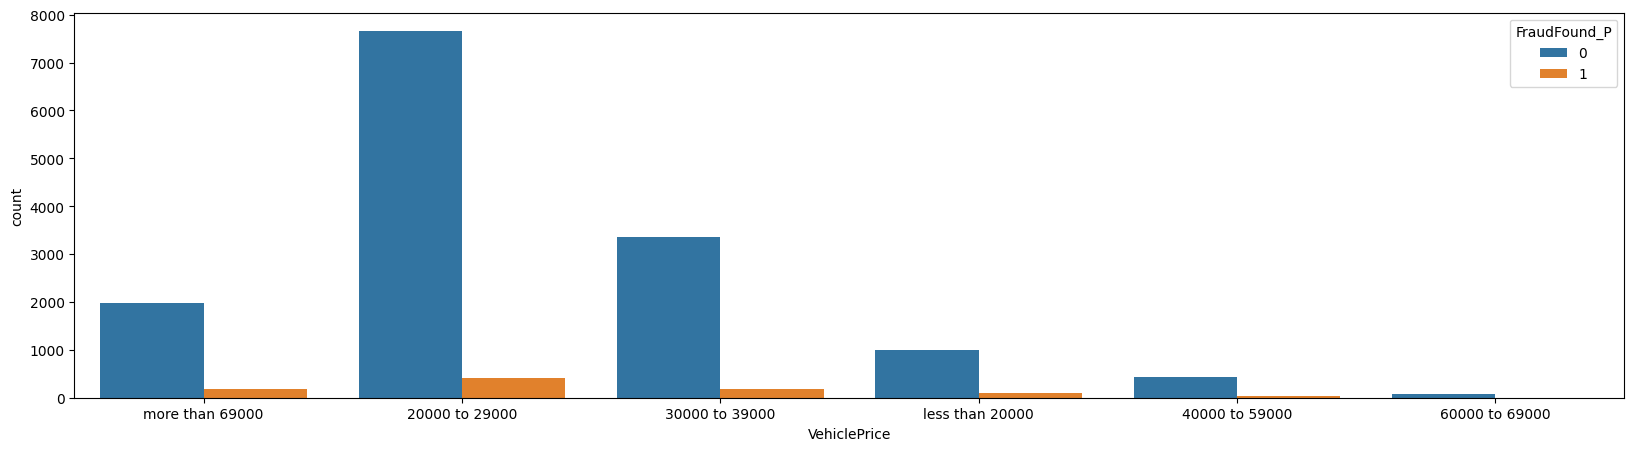

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(20,5)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,1,1)
sns.countplot(df, x="VehiclePrice", hue="FraudFound_P")

**c) Las variables “AgeOfPolicyHolder” y “FraudFound_P”.**


<Axes: xlabel='AgeOfPolicyHolder', ylabel='count'>

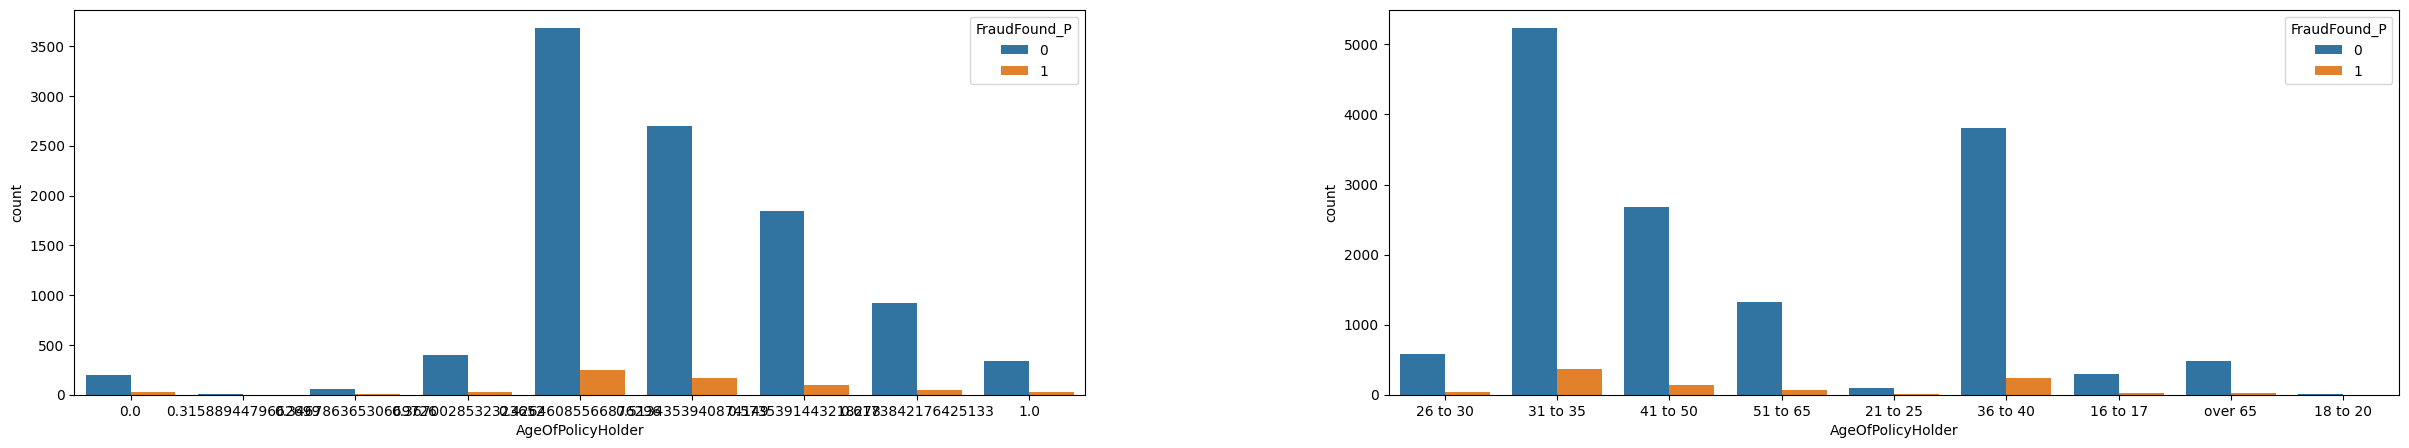

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(30,5)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()

plt.subplot(1,2,1)
sns.countplot(df_train_T, x="AgeOfPolicyHolder", hue="FraudFound_P")

plt.subplot(1,2,2)
sns.countplot(df, x="AgeOfPolicyHolder", hue="FraudFound_P")

**d) Incluye alguna otra relación o relaciones que consideres relevantes.**

<Axes: xlabel='PastNumberOfClaims', ylabel='count'>

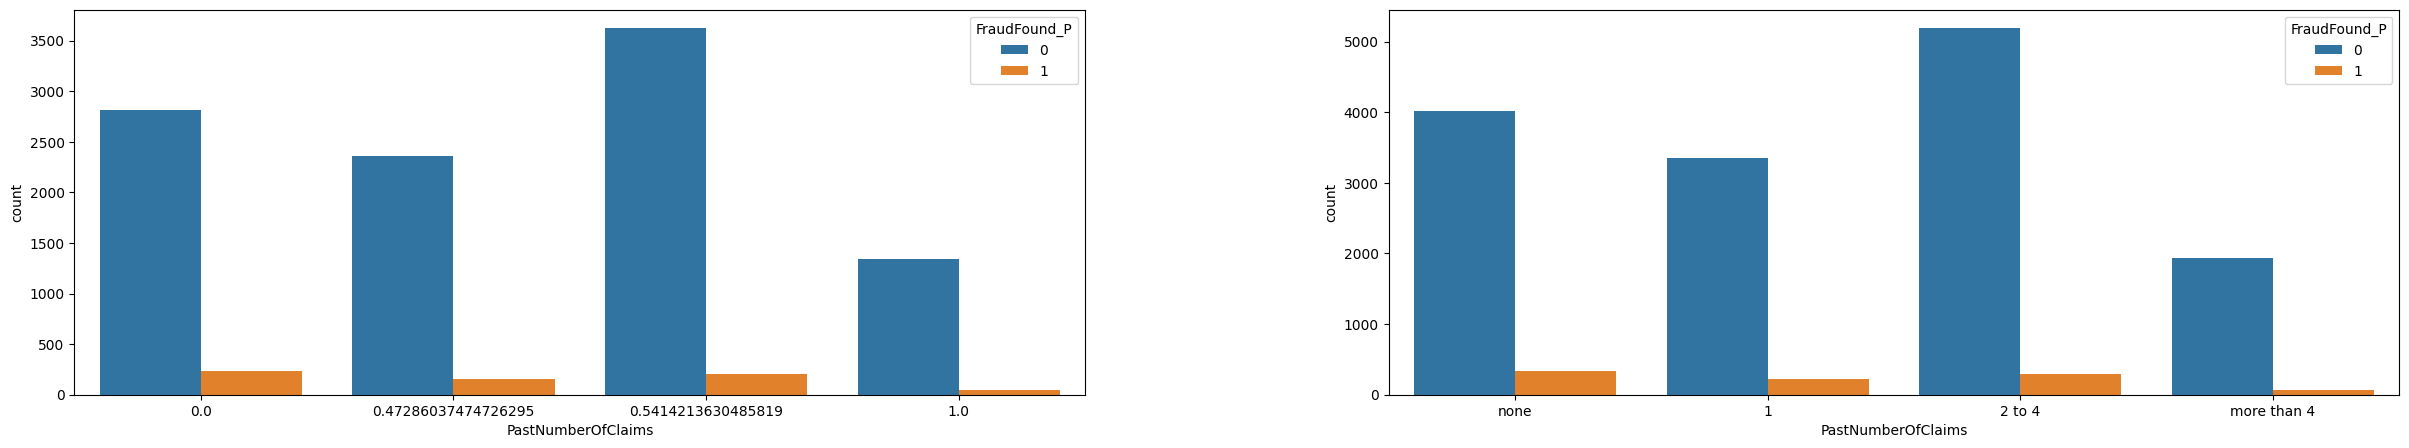

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(30,5)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()

plt.subplot(1,2,1)
sns.countplot(df_train_T, x="PastNumberOfClaims", hue="FraudFound_P")

plt.subplot(1,2,2)
sns.countplot(df, x="PastNumberOfClaims", hue="FraudFound_P")

<Axes: xlabel='PoliceReportFiled', ylabel='count'>

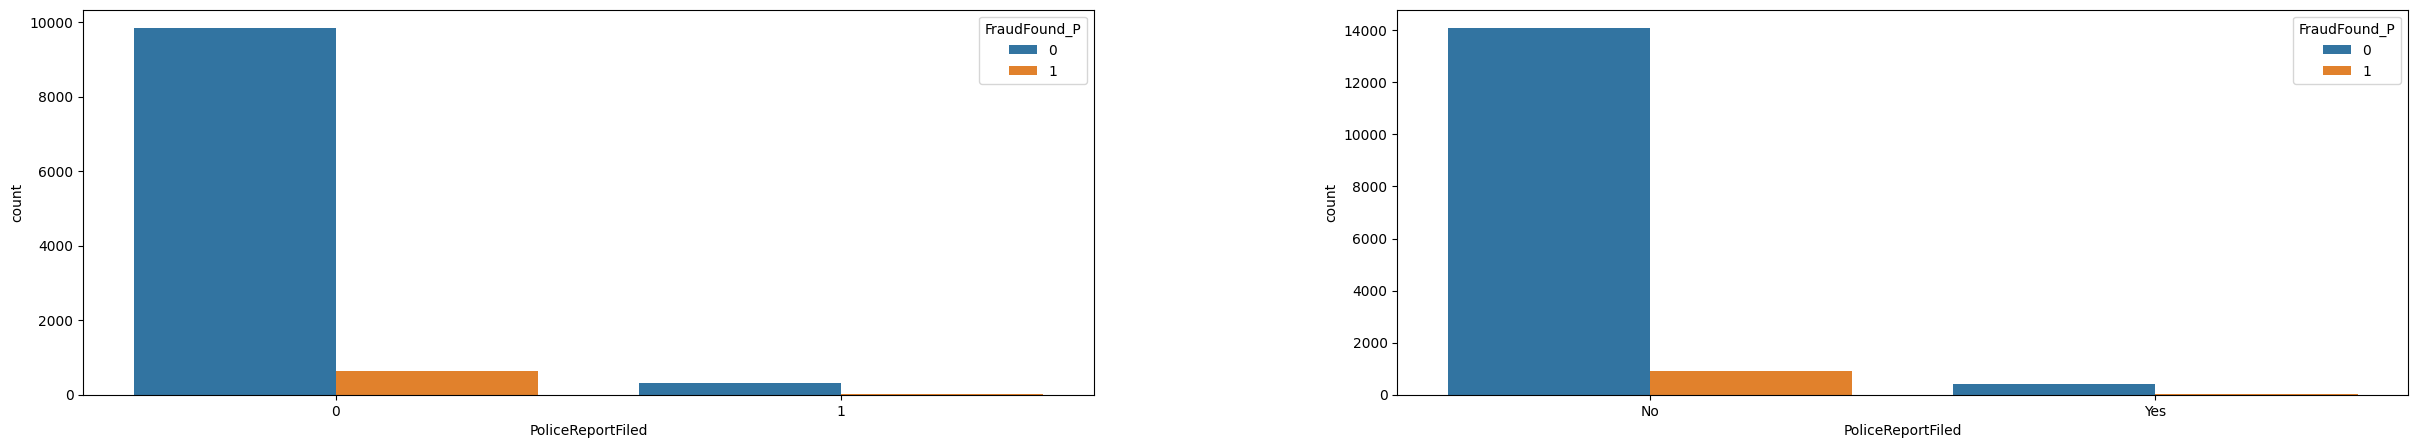

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(30,5)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)
axes = axes.ravel()

plt.subplot(1,2,1)
sns.countplot(df_train_T, x="PoliceReportFiled", hue="FraudFound_P")

plt.subplot(1,2,2)
sns.countplot(df, x="PoliceReportFiled", hue="FraudFound_P")

<Axes: xlabel='AgentType', ylabel='count'>

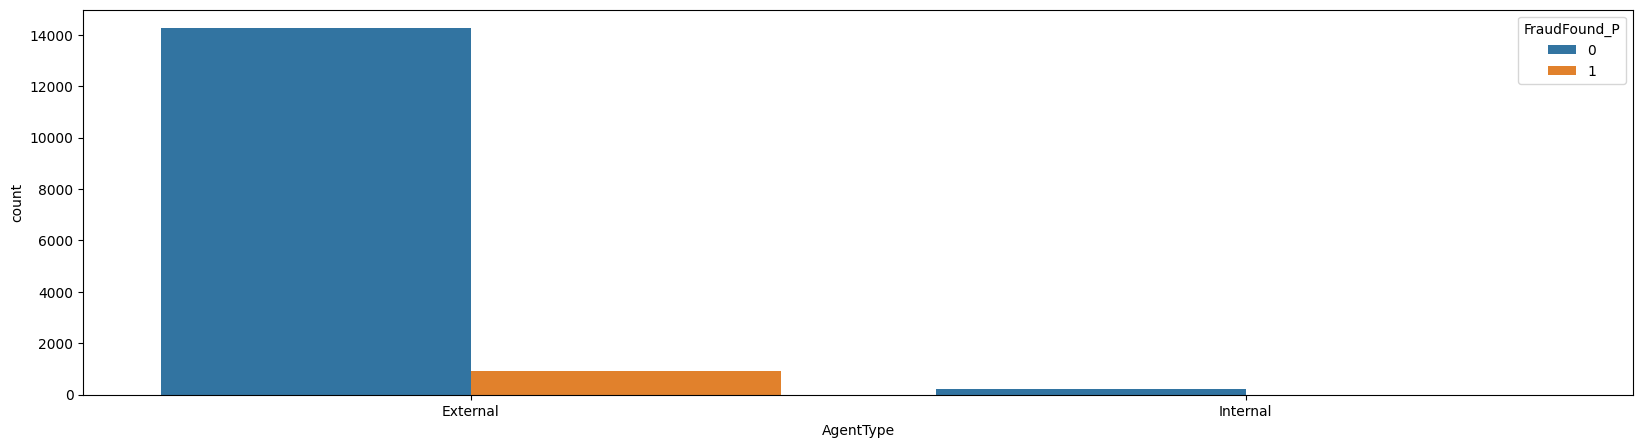

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(20,5)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,1,1)
sns.countplot(df, x="AgentType", hue="FraudFound_P")

<Axes: xlabel='VehicleCategory', ylabel='count'>

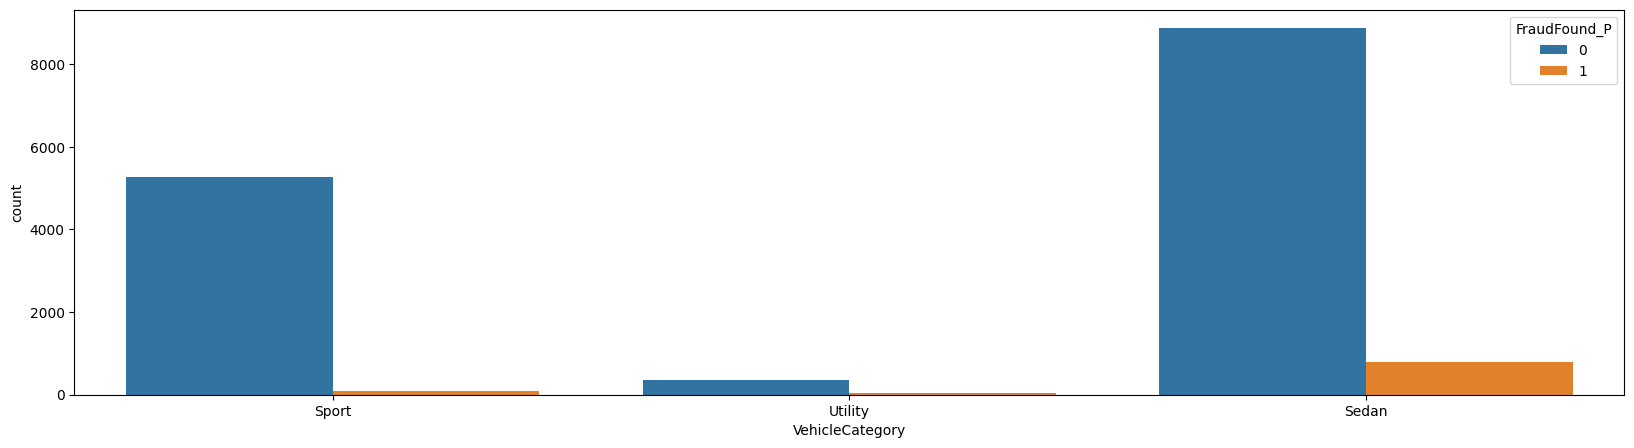

In [ ]:
fig, axes = plt.subplots(1,1, figsize=(20,5)) # ---> Matplotlib
plt.subplots_adjust(wspace=0.3)

plt.subplot(1,1,1)
sns.countplot(df, x="VehicleCategory", hue="FraudFound_P")

**e) Con base a los gráficos obtenidos incluye tus conclusiones al respecto.**

### Conclusión

El análisis exploratorio de datos realizado permitió comprender a fondo la estructura, calidad y naturaleza de la información disponible para la detección de fraudes en reclamos de seguros vehiculares. Se identificaron y eliminaron variables irrelevantes como `PolicyNumber`, `Age` y `PolicyType`, y se corrigieron registros erróneos en campos como `DayOfWeekClaimed` y `MonthClaimed`, mejorando así la integridad del dataset.

A través de la clasificación de las variables, se determinó que la mayoría de los atributos, aunque numéricos, deben ser tratados como categóricos. Se aplicaron transformaciones apropiadas para cada tipo de variable, destacando el uso de `QuantileTransformer` y `MinMaxScaler` para lograr una distribución más uniforme y escalas comparables entre variables.

Un hallazgo importante fue la detección de un **fuerte desbalance de clases**, con aproximadamente un 95% de casos legítimos frente a un 5% de casos fraudulentos. Este desequilibrio representa un reto significativo para el modelado, y será necesario aplicar técnicas de balanceo en etapas posteriores para asegurar un rendimiento adecuado de los modelos predictivos.

Por otro lado, aunque se identificaron algunas correlaciones fuertes entre variables (por ejemplo, entre `Month` y `MonthClaimed`, o entre `AgeOfVehicle` y `AgeOfPolicyHolder`), no se encontró una correlación directa fuerte entre las variables predictoras y la clase objetivo `FraudFound_P`, lo cual refuerza la importancia del preprocesamiento y la ingeniería de características en este tipo de problemas.

En resumen, el análisis exploratorio permitió sentar una base sólida para la fase de modelado, asegurando que los datos estén limpios, correctamente transformados y listos para entrenar modelos de machine learning capaces de abordar el desafío del fraude vehicular. Cabe mencionar que en este análisis exploratorio solo se tomó en cuenta la actividad para detección de fraudes a partir de los datos relacionados al siniestro y poliza; las actividades de determinación de severidad del daño y detección de autopartes dañadas serán incorporadas en entregas siguientes ya que los datasets que se utilizarán constan de imagenes que han sido previamente procesadas y no es necesario que pasen por un proceso de normalización.

In [ ]:
#Se guardan los dataframes que se requerirán para la Ingeniería de Características en archivos Pickle

import pickle

df_list = [df,df_train_T,XtrainT,XvalT, XtestT, ytrainT, yvalT, ytestT]

df_names = ['df','df_train_T','XtrainT','XvalT', 'XtestT', 'ytrainT', 'yvalT', 'ytestT']

path = "/content/Dataset_Deteccion_Fraude-main/"

for df_item in range(len(df_list)):
  with open(path + df_names[df_item] + '.pkl', 'wb') as f:
    pickle.dump(df_list[df_item], f)

In [ ]:
# Se compirmen los archivos Pickle en un ZIP ara descargarlos manualmente de Colab y cargarlos en GitHUb

import zipfile
import os

def zip_files(file_names, zip_file_name):
  """
  Zips the files specified in file_names into a zip archive.

  Args:
    file_names: A list of file names to be zipped.
    zip_file_name: The name of the zip archive to create.
  """

  with zipfile.ZipFile(zip_file_name, 'w') as zipf:
    for file_name in file_names:
      if os.path.exists(file_name):
        zipf.write(file_name)
      else:
        print(f"Warning: File '{file_name}' not found. Skipping.")

zip_files([f"/content/Dataset_Deteccion_Fraude-main/{name}.pkl" for name in df_names], '/content/Dataset_Deteccion_Fraude-main/my_data_corr_01.zip')